In [3]:
##now time to compare normalized residuals to a normal gaussian
#using the K-S test
from scipy import stats
import numpy as np
import matplotlib as plt
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *                        
import math
from mpl_toolkits.mplot3d import Axes3D


In [2]:
list_gals=['J0009','J0803','J0821','J0854','J0930','J0959','J1027','J1109','J1152',
           'J1315','J1328','J1352','J1420','J1524','J1526','J1606','J1630','J1720']

In [4]:
list_gals=['J0749']

In [13]:
for i in range(len(list_gals)):
    gal=list_gals[i]
    '''file_0='JANUS/MCMC_paper/error_corr/'+str(gal)+'/cocone_fix/emcee_burn_0_c.txt'
    file_1='JANUS/MCMC_paper/error_corr/'+str(gal)+'/cocone_fix/emcee_burn_1_c.txt'
    file_2='JANUS/MCMC_paper/error_corr/'+str(gal)+'/cocone_fix/emcee_burn_2_c.txt'
    file_3='JANUS/MCMC_paper/error_corr/'+str(gal)+'/cocone_fix/emcee_burn_3_c.txt'
    file_4='JANUS/MCMC_paper/error_corr/'+str(gal)+'/cocone_fix/emcee_burn_4_c.txt'
    file_4_5='JANUS/MCMC_paper/error_corr/'+str(gal)+'/cocone_fix/emcee_burn_5_c.txt'
    file_5='JANUS/MCMC_paper/error_corr/'+str(gal)+'/cocone_fix/emcee_burn_f_acc_c.txt'
    '''
    
    file_0='JANUS/'+str(gal)+'/cocone_long/emcee_burn_0_c.txt'
    file_1='JANUS/'+str(gal)+'/cocone_long/emcee_burn_1_c.txt'
    file_2='JANUS/'+str(gal)+'/cocone_long/emcee_burn_2_c.txt'
    file_3='JANUS/'+str(gal)+'/cocone_long/emcee_burn_3_c.txt'
    file_4='JANUS/'+str(gal)+'/cocone_long/emcee_burn_4_c.txt'
    file_4_5='JANUS/'+str(gal)+'/cocone_long/emcee_burn_5_c.txt'
    file_5='JANUS/'+str(gal)+'/cocone_long/emcee_burn_f_acc_c.txt'
    
    len_chain=500
    numwalkers=100
    
    with open(file_0, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_0=[]
        
        for line in data:
            words = line.split()
            emcee_0.append(float(words[0]))
    
    
    
    with open(file_1, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_1=[]
        
        for line in data:
            words = line.split()
            emcee_1.append(float(words[0]))
    with open(file_2, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_2=[]
        
        for line in data:
            words = line.split()
            emcee_2.append(float(words[0]))
    with open(file_3, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_3=[]
        
        for line in data:
            words = line.split()
            emcee_3.append(float(words[0]))
            
    with open(file_4, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_4=[]
        
        for line in data:
            words = line.split()
            emcee_4.append(float(words[0]))
            
    with open(file_4_5, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_4_5=[]
        
        for line in data:
            words = line.split()
            emcee_4_5.append(float(words[0]))
    with open(file_5, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_5=[]
        if numwalkers==1:
            for line in data:
                words = line.split()
                if words[0] == 'True':
                    emcee_5.append(1)
                else:
                    emcee_5.append(0)
        else:
            for line in data:
                words = line.split()
                emcee_5.append(float(words[0]))
    mcmc_0=[]
    mcmc_1=[]
    mcmc_2=[]
    mcmc_3=[]
    mcmc_4=[]
    mcmc_5=[]
    
    #plt.scatter(emcee_4, emcee_4)
    #plt.title('all Velocities')
    #plt.show()
    #for i in xrange(total number of steps*walkers)
    for i in range(numwalkers*len_chain):
        #for j in xrange(#walkers)
        for j in range(numwalkers):
            #if i==#steps-1 + #steps*j
            if i ==len_chain-1+len_chain*j:
                mcmc_0.append(emcee_0[i])
                mcmc_1.append(emcee_1[i])
                mcmc_2.append(emcee_2[i])
                mcmc_3.append(emcee_3[i])
                mcmc_4.append(emcee_4[i])
                mcmc_5.append(emcee_4_5[i])
               
    #li = tuple( [] for i in range( 10 ) )
    #li[0].append( 'foo' )
    #li[5].append( 'bar' )
    walker_0_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_1_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_2_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_3_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_4_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_5_c_l=tuple( [] for x in range(numwalkers*len_chain))
    
    
    for i in range(numwalkers*len_chain):
        #for j in xrange(#steps):
        for j in range(len_chain):
            
            if i < len_chain+len_chain*j and i >len_chain*j-1:
                walker_0_c_l[j].append(emcee_0[i])
                walker_1_c_l[j].append(emcee_1[i])
                walker_2_c_l[j].append(emcee_2[i])
                walker_3_c_l[j].append(emcee_3[i])
                walker_4_c_l[j].append(emcee_4[i])
                walker_5_c_l[j].append(emcee_4_5[i])
                
    
    
    xs=np.linspace(0,len_chain-1,len_chain)
    #print(np.array(walker_0), len(xs))
    
    '''ax1 = plt.subplot2grid((3,2),(0, 0))
    ax2 = plt.subplot2grid((3,2),(0, 1))
    ax3 = plt.subplot2grid((3,2),(1, 0))
    ax4 = plt.subplot2grid((3,2),(1, 1))
    ax5 = plt.subplot2grid((3,2),(2, 0))
    ax6 = plt.subplot2grid((3,2),(2, 1))
    for i in xrange(99):
        #print(i, len(xs), len(walker_0_c_l[i]))
    #ax1 = plt.subplot2grid((3,2),(0, 0))
        ax1.plot(xs,walker_0_c_l[i])#, label='Inclination Close Large', color='pink')
        #ax1.axhline(y=0, color='black')
        ax1.annotate('Inclination', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax1.plot(xs,walker_0_c_s[0], label='Inclination Close Small', color='blue')
        #ax1.plot(xs,walker_0_f_s[0], label='Inclination Far Small', color='turquoise')
        #ax1.legend()
        
        #ax2 = plt.subplot2grid((3,2),(1, 0))
        ax2.plot(xs,walker_1_c_l[i])#, label='PA Close Large', color='pink')
        ax2.annotate('PA', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax2.axhline(y=15, color='black')
        #ax2.axhline(y=195, color='black')
        #ax2.axhline(y=-165, color='black')
        #ax2.plot(xs,walker_1_c_s[0], label='PA Close Small', color='blue')
        #ax2.plot(xs,walker_1_f_s[0], label='PA Far Small', color='turquoise')
        #ax2.legend()
        
        #ax3 = plt.subplot2grid((3,2),(0, 1))
        ax3.plot(xs,walker_2_c_l[i])#, label='R Close Large', color='pink')
        #ax3.axhline(y=5, color='black')
        ax3.annotate('Radius', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax3.plot(xs,walker_2_c_s[0], label='R Close Small', color='blue')
        #ax3.plot(xs,walker_2_f_s[0], label='R Far Small', color='turquoise')
        #ax3.legend()
        
        #ax4 = plt.subplot2grid((3,2),(1, 1))
        ax4.plot(xs,walker_3_c_l[i])#, label='Opening Angle Close Large', color='pink')
        #ax4.axhline(y=55, color='black')
        ax4.annotate('Opening Angle', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax4.plot(xs,walker_3_c_s[0], label='Opening Angle Close Small', color='blue')
        #ax4.plot(xs,walker_3_f_s[0], label='Opening Angle Far Small', color='turquoise')
        #ax4.legend()
        
        #ax5 = plt.subplot2grid((3,2),(1, 2))
        ax5.plot(xs,walker_4_c_l[i])#, label='Close Large', color='pink')
        #ax5.axhline(y=900, color='black')
        ax5.annotate('Opening Angle 2', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    
    
        ax6.plot(xs,walker_5_c_l[i])
        ax6.annotate('Max Velocity', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    
    
    
    plt.tight_layout()
    savefig('../'+str(gal)+'walkers_cocone.pdf')'''
    #plt.show()
    print(gal)
    print_this=['$',str(int(round(np.percentile(mcmc_0, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_0 ,50+68.2689492/2)-np.percentile(mcmc_0,50),0))),'\\\-',str(int(round(np.percentile(mcmc_0 ,50)-np.percentile(mcmc_0,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_1, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_1 ,50+68.2689492/2)-np.percentile(mcmc_1,50),0))),'\\\-',str(int(round(np.percentile(mcmc_1 ,50)-np.percentile(mcmc_1,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_2, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_2 ,50+68.2689492/2)-np.percentile(mcmc_2,50),0))),'\\\-',str(int(round(np.percentile(mcmc_2 ,50)-np.percentile(mcmc_2,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_3, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_3 ,50+68.2689492/2)-np.percentile(mcmc_3,50),0))),'\\\-',str(int(round(np.percentile(mcmc_3 ,50)-np.percentile(mcmc_3,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_4, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_4 ,50+68.2689492/2)-np.percentile(mcmc_4,50),0))),'\\\-',str(int(round(np.percentile(mcmc_4 ,50)-np.percentile(mcmc_4,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_5, [50])[0],-1))),'\substack{+',str(int(round(np.percentile(mcmc_5 ,50+68.2689492/2)-np.percentile(mcmc_5,50),-1))),'\\\-',str(int(round(np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,50-68.2689492/2),-1))),'}$ \\\ ']
    print(' '.join(print_this))
    
    print_this=['result_s = ',str(round(np.percentile(mcmc_0, [50])[0],2)),',',
        str(round(np.percentile(mcmc_1, [50])[0],2)),',',
        str(round(np.percentile(mcmc_2, [50])[0],2)),',',
        str(round(np.percentile(mcmc_3, [50])[0],2)),',',
        str(round(np.percentile(mcmc_4, [50])[0],2)),',',
        str(round(np.percentile(mcmc_5, [50])[0],2))]
    print(' '.join(print_this))
    
   

J0749
$ 23 \substack{+ 35 \\- 22 }$ & $ 48 \substack{+ 75 \\- 45 }$ & $ 2 \substack{+ 5 \\- 1 }$ & $ 45 \substack{+ 16 \\- 32 }$ & $ 75 \substack{+ 10 \\- 44 }$ & $ 340 \substack{+ 270 \\- 180 }$ \\ 
result_s =  22.52 , 48.35 , 2.0 , 44.62 , 74.83 , 344.83


In [6]:
'''NESTING CONE'''

for i in range(len(list_gals)):
    gal=list_gals[i]
    file_0='JANUS/'+str(gal)+'/nesting/emcee_burn_0_c.txt'
    file_1='JANUS/'+str(gal)+'/nesting/emcee_burn_1_c.txt'
    file_2='JANUS/'+str(gal)+'/nesting/emcee_burn_2_c.txt'
    file_3='JANUS/'+str(gal)+'/nesting/emcee_burn_3_c.txt'
    file_4='JANUS/'+str(gal)+'/nesting/emcee_burn_4_c.txt'
    file_4_5='JANUS/'+str(gal)+'/nesting/emcee_burn_5_c.txt'
    file_5='JANUS/'+str(gal)+'/nesting/emcee_burn_f_acc_c.txt'
    
    
    len_chain=200
    numwalkers=100
    
    with open(file_0, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_0=[]
        
        for line in data:
            words = line.split()
            emcee_0.append(float(words[0]))
    
    
    
    with open(file_1, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_1=[]
        
        for line in data:
            words = line.split()
            emcee_1.append(float(words[0]))
    with open(file_2, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_2=[]
        
        for line in data:
            words = line.split()
            emcee_2.append(float(words[0]))
    with open(file_3, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_3=[]
        
        for line in data:
            words = line.split()
            emcee_3.append(float(words[0]))
            
    with open(file_4, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_4=[]
        
        for line in data:
            words = line.split()
            emcee_4.append(float(words[0]))
            
    with open(file_4_5, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_4_5=[]
        
        for line in data:
            words = line.split()
            emcee_4_5.append(float(words[0]))
    with open(file_5, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_5=[]
        if numwalkers==1:
            for line in data:
                words = line.split()
                if words[0] == 'True':
                    emcee_5.append(1)
                else:
                    emcee_5.append(0)
        else:
            for line in data:
                words = line.split()
                emcee_5.append(float(words[0]))
    mcmc_0=[]
    mcmc_1=[]
    mcmc_2=[]
    mcmc_3=[]
    mcmc_4=[]
    mcmc_5=[]
    
    #plt.scatter(emcee_4, emcee_4)
    #plt.title('all Velocities')
    #plt.show()
    #for i in xrange(total number of steps*walkers)
    for i in range(numwalkers*len_chain):
        #for j in xrange(#walkers)
        for j in range(numwalkers):
            #if i==#steps-1 + #steps*j
            if i ==len_chain-1+len_chain*j:
                mcmc_0.append(emcee_0[i])
                mcmc_1.append(emcee_1[i])
                mcmc_2.append(emcee_2[i])
                mcmc_3.append(emcee_3[i])
                mcmc_4.append(emcee_4[i])
                mcmc_5.append(emcee_4_5[i])
               
    #li = tuple( [] for i in range( 10 ) )
    #li[0].append( 'foo' )
    #li[5].append( 'bar' )
    walker_0_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_1_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_2_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_3_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_4_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_5_c_l=tuple( [] for x in range(numwalkers*len_chain))
    
    
    for i in range(numwalkers*len_chain):
        #for j in xrange(#steps):
        for j in range(len_chain):
            
            if i < len_chain+len_chain*j and i >len_chain*j-1:
                walker_0_c_l[j].append(emcee_0[i])
                walker_1_c_l[j].append(emcee_1[i])
                walker_2_c_l[j].append(emcee_2[i])
                walker_3_c_l[j].append(emcee_3[i])
                walker_4_c_l[j].append(emcee_4[i])
                walker_5_c_l[j].append(emcee_4_5[i])
                
    
    
    xs=np.linspace(0,len_chain-1,len_chain)
    #print(np.array(walker_0), len(xs))
    
    ax1 = plt.subplot2grid((3,2),(0, 0))
    ax2 = plt.subplot2grid((3,2),(0, 1))
    ax3 = plt.subplot2grid((3,2),(1, 0))
    ax4 = plt.subplot2grid((3,2),(1, 1))
    ax5 = plt.subplot2grid((3,2),(2, 0))
    ax6 = plt.subplot2grid((3,2),(2, 1))
    for i in range(99):
        #print(i, len(xs), len(walker_0_c_l[i]))
    #ax1 = plt.subplot2grid((3,2),(0, 0))
        ax1.plot(xs,walker_0_c_l[i])#, label='Inclination Close Large', color='pink')
        #ax1.axhline(y=0, color='black')
        ax1.annotate('Inclination', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax1.plot(xs,walker_0_c_s[0], label='Inclination Close Small', color='blue')
        #ax1.plot(xs,walker_0_f_s[0], label='Inclination Far Small', color='turquoise')
        #ax1.legend()
        
        #ax2 = plt.subplot2grid((3,2),(1, 0))
        ax2.plot(xs,walker_1_c_l[i])#, label='PA Close Large', color='pink')
        ax2.annotate('PA', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax2.axhline(y=15, color='black')
        #ax2.axhline(y=195, color='black')
        #ax2.axhline(y=-165, color='black')
        #ax2.plot(xs,walker_1_c_s[0], label='PA Close Small', color='blue')
        #ax2.plot(xs,walker_1_f_s[0], label='PA Far Small', color='turquoise')
        #ax2.legend()
        
        #ax3 = plt.subplot2grid((3,2),(0, 1))
        ax3.plot(xs,walker_2_c_l[i])#, label='R Close Large', color='pink')
        #ax3.axhline(y=5, color='black')
        ax3.annotate('Radius', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax3.plot(xs,walker_2_c_s[0], label='R Close Small', color='blue')
        #ax3.plot(xs,walker_2_f_s[0], label='R Far Small', color='turquoise')
        #ax3.legend()
        
        #ax4 = plt.subplot2grid((3,2),(1, 1))
        ax4.plot(xs,walker_3_c_l[i])#, label='Opening Angle Close Large', color='pink')
        #ax4.axhline(y=55, color='black')
        ax4.annotate('Opening Angle', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax4.plot(xs,walker_3_c_s[0], label='Opening Angle Close Small', color='blue')
        #ax4.plot(xs,walker_3_f_s[0], label='Opening Angle Far Small', color='turquoise')
        #ax4.legend()
        
        #ax5 = plt.subplot2grid((3,2),(1, 2))
        ax5.plot(xs,walker_4_c_l[i])#, label='Close Large', color='pink')
        #ax5.axhline(y=900, color='black')
        ax5.annotate('Opening Angle 2', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    
    
        ax6.plot(xs,walker_5_c_l[i])
        ax6.annotate('Max Velocity', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    
    
    
    plt.tight_layout()
    savefig('../'+str(gal)+'walkers_nesting.pdf')
    #plt.show()
    print(gal)
    print_this=['$',str(int(round(np.percentile(mcmc_0, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_0 ,50+68.2689492/2)-np.percentile(mcmc_0,50),0))),'\\\-',str(int(round(np.percentile(mcmc_0 ,50)-np.percentile(mcmc_0,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_1, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_1 ,50+68.2689492/2)-np.percentile(mcmc_1,50),0))),'\\\-',str(int(round(np.percentile(mcmc_1 ,50)-np.percentile(mcmc_1,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_2, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_2 ,50+68.2689492/2)-np.percentile(mcmc_2,50),0))),'\\\-',str(int(round(np.percentile(mcmc_2 ,50)-np.percentile(mcmc_2,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_3, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_3 ,50+68.2689492/2)-np.percentile(mcmc_3,50),0))),'\\\-',str(int(round(np.percentile(mcmc_3 ,50)-np.percentile(mcmc_3,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_4, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_4 ,50+68.2689492/2)-np.percentile(mcmc_4,50),0))),'\\\-',str(int(round(np.percentile(mcmc_4 ,50)-np.percentile(mcmc_4,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_5, [50])[0],-1))),'\substack{+',str(int(round(np.percentile(mcmc_5 ,50+68.2689492/2)-np.percentile(mcmc_5,50),-1))),'\\\-',str(int(round(np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,50-68.2689492/2),-1))),'}$ \\\ ']
    print(' '.join(print_this))
    
    print_this=['result_n = ',str(round(np.percentile(mcmc_0, [50])[0],2)),',',
        str(round(np.percentile(mcmc_1, [50])[0],2)),',',
        str(round(np.percentile(mcmc_2, [50])[0],2)),',',
        str(round(np.percentile(mcmc_3, [50])[0],2)),',',
        str(round(np.percentile(mcmc_4, [50])[0],2)),',',
        str(round(np.percentile(mcmc_5, [50])[0],2))]
    #print(' '.join(print_this))
    
print('this is nesting')

J0749
$ 68 \substack{+ 16 \\- 34 }$ & $ 66 \substack{+ 42 \\- 48 }$ & $ 5 \substack{+ 2 \\- 4 }$ & $ 31 \substack{+ 19 \\- 8 }$ & $ 87 \substack{+ 3 \\- 21 }$ & $ 750 \substack{+ 180 \\- 350 }$ \\ 
this is nesting


In [11]:
'''Symmetric BICONE'''


for i in range(len(list_gals)):
    gal=list_gals[i]
    file_0='JANUS/'+str(gal)+'/bicone_long/emcee_burn_0_c.txt'
    file_1='JANUS/'+str(gal)+'/bicone_long/emcee_burn_1_c.txt'
    file_2='JANUS/'+str(gal)+'/bicone_long/emcee_burn_2_c.txt'
    file_3='JANUS/'+str(gal)+'/bicone_long/emcee_burn_3_c.txt'
    file_4='JANUS/'+str(gal)+'/bicone_long/emcee_burn_4_c.txt'
    #file_4_5='JANUS/MCMC_paper/error_corr/'+str(gal)+'/nesting_fix/emcee_burn_5_c.txt'
    file_5='JANUS/'+str(gal)+'/bicone/emcee_burn_f_acc_c.txt'
    
    
    len_chain=500
    numwalkers=100
    
    with open(file_0, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_0=[]
        
        for line in data:
            words = line.split()
            emcee_0.append(float(words[0]))
    
    
    
    with open(file_1, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_1=[]
        
        for line in data:
            words = line.split()
            emcee_1.append(float(words[0]))
    with open(file_2, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_2=[]
        
        for line in data:
            words = line.split()
            emcee_2.append(float(words[0]))
    with open(file_3, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_3=[]
        
        for line in data:
            words = line.split()
            emcee_3.append(float(words[0]))
            
    with open(file_4, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_4=[]
        
        for line in data:
            words = line.split()
            emcee_4.append(float(words[0]))
            
    '''with open(file_4_5, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_4_5=[]
        
        for line in data:
            words = line.split()
            emcee_4_5.append(float(words[0]))'''
    with open(file_5, 'r') as f:
        data = f.readlines()
        #print(data)
        emcee_5=[]
        if numwalkers==1:
            for line in data:
                words = line.split()
                if words[0] == 'True':
                    emcee_5.append(1)
                else:
                    emcee_5.append(0)
        else:
            for line in data:
                words = line.split()
                emcee_5.append(float(words[0]))
    mcmc_0=[]
    mcmc_1=[]
    mcmc_2=[]
    mcmc_3=[]
    mcmc_4=[]
    mcmc_5=[]
    
    #plt.scatter(emcee_4, emcee_4)
    #plt.title('all Velocities')
    #plt.show()
    #for i in xrange(total number of steps*walkers)
    for i in range(numwalkers*len_chain):
        #for j in xrange(#walkers)
        for j in range(numwalkers):
            #if i==#steps-1 + #steps*j
            if i ==len_chain-1+len_chain*j:
                mcmc_0.append(emcee_0[i])
                mcmc_1.append(emcee_1[i])
                mcmc_2.append(emcee_2[i])
                mcmc_3.append(emcee_3[i])
                mcmc_4.append(emcee_4[i])
                #mcmc_5.append(emcee_4_5[i])
               
    #li = tuple( [] for i in range( 10 ) )
    #li[0].append( 'foo' )
    #li[5].append( 'bar' )
    walker_0_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_1_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_2_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_3_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_4_c_l=tuple( [] for x in range(numwalkers*len_chain))
    walker_5_c_l=tuple( [] for x in range(numwalkers*len_chain))
    
    
    for i in range(numwalkers*len_chain):
        #for j in xrange(#steps):
        for j in range(len_chain):
            
            if i < len_chain+len_chain*j and i >len_chain*j-1:
                walker_0_c_l[j].append(emcee_0[i])
                walker_1_c_l[j].append(emcee_1[i])
                walker_2_c_l[j].append(emcee_2[i])
                walker_3_c_l[j].append(emcee_3[i])
                walker_4_c_l[j].append(emcee_4[i])
                #walker_5_c_l[j].append(emcee_4_5[i])
                
    
    
    xs=np.linspace(0,len_chain-1,len_chain)
    #print(np.array(walker_0), len(xs))
    
    ax1 = plt.subplot2grid((3,2),(0, 0))
    ax2 = plt.subplot2grid((3,2),(0, 1))
    ax3 = plt.subplot2grid((3,2),(1, 0))
    ax4 = plt.subplot2grid((3,2),(1, 1))
    ax5 = plt.subplot2grid((3,2),(2, 0))
    #ax6 = plt.subplot2grid((3,2),(2, 1))
    for i in range(99):
        #print(i, len(xs), len(walker_0_c_l[i]))
    #ax1 = plt.subplot2grid((3,2),(0, 0))
        ax1.plot(xs,walker_0_c_l[i])#, label='Inclination Close Large', color='pink')
        #ax1.axhline(y=0, color='black')
        ax1.annotate('Inclination', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax1.plot(xs,walker_0_c_s[0], label='Inclination Close Small', color='blue')
        #ax1.plot(xs,walker_0_f_s[0], label='Inclination Far Small', color='turquoise')
        #ax1.legend()
        
        #ax2 = plt.subplot2grid((3,2),(1, 0))
        ax2.plot(xs,walker_1_c_l[i])#, label='PA Close Large', color='pink')
        ax2.annotate('PA', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax2.axhline(y=15, color='black')
        #ax2.axhline(y=195, color='black')
        #ax2.axhline(y=-165, color='black')
        #ax2.plot(xs,walker_1_c_s[0], label='PA Close Small', color='blue')
        #ax2.plot(xs,walker_1_f_s[0], label='PA Far Small', color='turquoise')
        #ax2.legend()
        
        #ax3 = plt.subplot2grid((3,2),(0, 1))
        ax3.plot(xs,walker_2_c_l[i])#, label='R Close Large', color='pink')
        #ax3.axhline(y=5, color='black')
        ax3.annotate('Radius', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax3.plot(xs,walker_2_c_s[0], label='R Close Small', color='blue')
        #ax3.plot(xs,walker_2_f_s[0], label='R Far Small', color='turquoise')
        #ax3.legend()
        
        #ax4 = plt.subplot2grid((3,2),(1, 1))
        ax4.plot(xs,walker_3_c_l[i])#, label='Opening Angle Close Large', color='pink')
        #ax4.axhline(y=55, color='black')
        ax4.annotate('Opening Angle', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
        #ax4.plot(xs,walker_3_c_s[0], label='Opening Angle Close Small', color='blue')
        #ax4.plot(xs,walker_3_f_s[0], label='Opening Angle Far Small', color='turquoise')
        #ax4.legend()
        
        #ax5 = plt.subplot2grid((3,2),(1, 2))
        ax5.plot(xs,walker_4_c_l[i])#, label='Close Large', color='pink')
        #ax5.axhline(y=900, color='black')
        ax5.annotate('Max Velocity', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    
    
    
    plt.tight_layout()
    savefig('../'+str(gal)+'walkers_bicone.pdf')
    #plt.show()
    print(gal)
    print_this=['$',str(int(round(np.percentile(mcmc_0, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_0 ,50+68.2689492/2)-np.percentile(mcmc_0,50),0))),'\\\-',str(int(round(np.percentile(mcmc_0 ,50)-np.percentile(mcmc_0,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_1, [50])[0],-1))),'\substack{+',str(int(round(np.percentile(mcmc_1 ,50+68.2689492/2)-np.percentile(mcmc_1,50),-1))),'\\\-',str(int(round(np.percentile(mcmc_1 ,50)-np.percentile(mcmc_1,50-68.2689492/2),-1))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_2, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_2 ,50+68.2689492/2)-np.percentile(mcmc_2,50),0))),'\\\-',str(int(round(np.percentile(mcmc_2 ,50)-np.percentile(mcmc_2,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_3, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_3 ,50+68.2689492/2)-np.percentile(mcmc_3,50),0))),'\\\-',str(int(round(np.percentile(mcmc_3 ,50)-np.percentile(mcmc_3,50-68.2689492/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_4, [50])[0],-1))),'\substack{+',str(int(round(np.percentile(mcmc_4 ,50+68.2689492/2)-np.percentile(mcmc_4,50),-1))),'\\\-',str(int(round(np.percentile(mcmc_4 ,50)-np.percentile(mcmc_4,50-68.2689492/2),-1))),'}$ \\\ ']
      #'$',str(round(np.percentile(mcmc_5, [50])[0],2)),'\substack{+',str(round(np.percentile(mcmc_5 ,50+68.2689492/2)-np.percentile(mcmc_5,50),2)),'\\\-',str(round(np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,50-68.2689492/2),2)),'}$ \\\ ']
    print(' '.join(print_this))
    
    print('now 3 sigma')
    
    print_this=['$',str(int(round(np.percentile(mcmc_0, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_0 ,50+99.73/2)-np.percentile(mcmc_0,50),0))),'\\\-',str(int(round(np.percentile(mcmc_0 ,50)-np.percentile(mcmc_0,50-99.73/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_1, [50])[0],-1))),'\substack{+',str(int(round(np.percentile(mcmc_1 ,50+99.73/2)-np.percentile(mcmc_1,50),-1))),'\\\-',str(int(round(np.percentile(mcmc_1 ,50)-np.percentile(mcmc_1,50-99.73/2),-1))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_2, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_2 ,50+99.73/2)-np.percentile(mcmc_2,50),0))),'\\\-',str(int(round(np.percentile(mcmc_2 ,50)-np.percentile(mcmc_2,50-99.73/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_3, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_3 ,50+99.73/2)-np.percentile(mcmc_3,50),0))),'\\\-',str(int(round(np.percentile(mcmc_3 ,50)-np.percentile(mcmc_3,50-99.73/2),0))),'}$ &',
      '$',str(int(round(np.percentile(mcmc_4, [50])[0],-1))),'\substack{+',str(int(round(np.percentile(mcmc_4 ,50+99.73/2)-np.percentile(mcmc_4,50),-1))),'\\\-',str(int(round(np.percentile(mcmc_4 ,50)-np.percentile(mcmc_4,50-99.73/2),-1))),'}$ \\\ ']
      #'$',str(round(np.percentile(mcmc_5, [50])[0],2)),'\substack{+',str(round(np.percentile(mcmc_5 ,50+68.2689492/2)-np.percentile(mcmc_5,50),2)),'\\\-',str(round(np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,50-68.2689492/2),2)),'}$ \\\ ']
    print(' '.join(print_this))
    
    
    print_this=['result_s = ',str(round(np.percentile(mcmc_0, [50])[0],2)),',',
        str(round(np.percentile(mcmc_1, [50])[0],2)),',',
        str(round(np.percentile(mcmc_2, [50])[0],2)),',',
        str(round(np.percentile(mcmc_3, [50])[0],2)),',',
        str(round(np.percentile(mcmc_4, [50])[0],2))]
        
    print(' '.join(print_this))
    
print('this is symmetric')

J0749
$ 11 \substack{+ 26 \\- 7 }$ & $ 60 \substack{+ 110 \\- 50 }$ & $ 1 \substack{+ 7 \\- 1 }$ & $ 44 \substack{+ 39 \\- 33 }$ & $ 300 \substack{+ 630 \\- 180 }$ \\ 
now 3 sigma
$ 11 \substack{+ 69 \\- 10 }$ & $ 60 \substack{+ 220 \\- 60 }$ & $ 1 \substack{+ 9 \\- 1 }$ & $ 44 \substack{+ 45 \\- 44 }$ & $ 300 \substack{+ 700 \\- 280 }$ \\ 
result_s =  10.54 , 61.54 , 1.05 , 44.27 , 295.22
this is symmetric


In [12]:
print('done')

done


mean f_acc 0.166


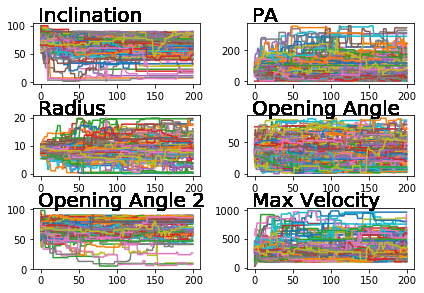

$ 62 \substack{+ 16 \\- 22 }$ & $ 75 \substack{+ 121 \\- 53 }$ & $ 9 \substack{+ 4 \\- 5 }$ & $ 38 \substack{+ 23 \\- 27 }$ & $ 81 \substack{+ 5 \\- 23 }$ & $ 320 \substack{+ 290 \\- 170 }$ \\ 


In [26]:
file_0='JANUS/J0930_deeper_investigation/all_four_start/emcee_burn_0_c.txt'
file_1='JANUS/J0930_deeper_investigation/all_four_start/emcee_burn_1_c.txt'
file_2='JANUS/J0930_deeper_investigation/all_four_start/emcee_burn_2_c.txt'
file_3='JANUS/J0930_deeper_investigation/all_four_start/emcee_burn_3_c.txt'
file_4='JANUS/J0930_deeper_investigation/all_four_start/emcee_burn_4_c.txt'
file_4_5='JANUS/J0930_deeper_investigation/all_four_start/emcee_burn_5_c.txt'
file_5='JANUS/J0930_deeper_investigation/all_four_start/emcee_burn_f_acc_c.txt'


len_chain=200
numwalkers=100

with open(file_0, 'r') as f:
    data = f.readlines()
    #print(data)
    emcee_0=[]

    for line in data:
        words = line.split()
        emcee_0.append(float(words[0]))



with open(file_1, 'r') as f:
    data = f.readlines()
    #print(data)
    emcee_1=[]

    for line in data:
        words = line.split()
        emcee_1.append(float(words[0]))
with open(file_2, 'r') as f:
    data = f.readlines()
    #print(data)
    emcee_2=[]

    for line in data:
        words = line.split()
        emcee_2.append(float(words[0]))
with open(file_3, 'r') as f:
    data = f.readlines()
    #print(data)
    emcee_3=[]

    for line in data:
        words = line.split()
        emcee_3.append(float(words[0]))

with open(file_4, 'r') as f:
    data = f.readlines()
    #print(data)
    emcee_4=[]

    for line in data:
        words = line.split()
        emcee_4.append(float(words[0]))

with open(file_4_5, 'r') as f:
    data = f.readlines()
    #print(data)
    emcee_4_5=[]

    for line in data:
        words = line.split()
        emcee_4_5.append(float(words[0]))
with open(file_5, 'r') as f:
    data = f.readlines()
    #print(data)
    emcee_5=[]
    if numwalkers==1:
        for line in data:
            words = line.split()
            if words[0] == 'True':
                emcee_5.append(1)
            else:
                emcee_5.append(0)
    else:
        for line in data:
            words = line.split()
            emcee_5.append(float(words[0]))
mcmc_0=[]
mcmc_1=[]
mcmc_2=[]
mcmc_3=[]
mcmc_4=[]
mcmc_5=[]

#plt.scatter(emcee_4, emcee_4)
#plt.title('all Velocities')
#plt.show()
#for i in xrange(total number of steps*walkers)
for i in range(numwalkers*len_chain):
    #for j in xrange(#walkers)
    for j in range(numwalkers):
        #if i==#steps-1 + #steps*j
        if i ==len_chain-1+len_chain*j:
            mcmc_0.append(emcee_0[i])
            mcmc_1.append(emcee_1[i])
            mcmc_2.append(emcee_2[i])
            mcmc_3.append(emcee_3[i])
            mcmc_4.append(emcee_4[i])
            mcmc_5.append(emcee_4_5[i])
print('mean f_acc',np.mean(emcee_5))
#li = tuple( [] for i in range( 10 ) )
#li[0].append( 'foo' )
#li[5].append( 'bar' )
walker_0_c_l=tuple( [] for x in range(numwalkers*len_chain))
walker_1_c_l=tuple( [] for x in range(numwalkers*len_chain))
walker_2_c_l=tuple( [] for x in range(numwalkers*len_chain))
walker_3_c_l=tuple( [] for x in range(numwalkers*len_chain))
walker_4_c_l=tuple( [] for x in range(numwalkers*len_chain))
walker_5_c_l=tuple( [] for x in range(numwalkers*len_chain))


for i in range(numwalkers*len_chain):
    #for j in xrange(#steps):
    for j in range(len_chain):

        if i < len_chain+len_chain*j and i >len_chain*j-1:
            walker_0_c_l[j].append(emcee_0[i])
            walker_1_c_l[j].append(emcee_1[i])
            walker_2_c_l[j].append(emcee_2[i])
            walker_3_c_l[j].append(emcee_3[i])
            walker_4_c_l[j].append(emcee_4[i])
            walker_5_c_l[j].append(emcee_4_5[i])



xs=np.linspace(0,len_chain-1,len_chain)
#print(np.array(walker_0), len(xs))

ax1 = plt.subplot2grid((3,2),(0, 0))
ax2 = plt.subplot2grid((3,2),(0, 1))
ax3 = plt.subplot2grid((3,2),(1, 0))
ax4 = plt.subplot2grid((3,2),(1, 1))
ax5 = plt.subplot2grid((3,2),(2, 0))
ax6 = plt.subplot2grid((3,2),(2, 1))
for i in range(numwalkers-1):
    #print(i, len(xs), len(walker_0_c_l[i]))
#ax1 = plt.subplot2grid((3,2),(0, 0))
    ax1.plot(xs,walker_0_c_l[i])#, label='Inclination Close Large', color='pink')
    #ax1.axhline(y=0, color='black')
    ax1.annotate('Inclination', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    #ax1.plot(xs,walker_0_c_s[0], label='Inclination Close Small', color='blue')
    #ax1.plot(xs,walker_0_f_s[0], label='Inclination Far Small', color='turquoise')
    #ax1.legend()

    #ax2 = plt.subplot2grid((3,2),(1, 0))
    ax2.plot(xs,walker_1_c_l[i])#, label='PA Close Large', color='pink')
    ax2.annotate('PA', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    #ax2.axhline(y=15, color='black')
    #ax2.axhline(y=195, color='black')
    #ax2.axhline(y=-165, color='black')
    #ax2.plot(xs,walker_1_c_s[0], label='PA Close Small', color='blue')
    #ax2.plot(xs,walker_1_f_s[0], label='PA Far Small', color='turquoise')
    #ax2.legend()

    #ax3 = plt.subplot2grid((3,2),(0, 1))
    ax3.plot(xs,walker_2_c_l[i])#, label='R Close Large', color='pink')
    #ax3.axhline(y=5, color='black')
    ax3.annotate('Radius', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    #ax3.plot(xs,walker_2_c_s[0], label='R Close Small', color='blue')
    #ax3.plot(xs,walker_2_f_s[0], label='R Far Small', color='turquoise')
    #ax3.legend()

    #ax4 = plt.subplot2grid((3,2),(1, 1))
    ax4.plot(xs,walker_3_c_l[i])#, label='Opening Angle Close Large', color='pink')
    #ax4.axhline(y=55, color='black')
    ax4.annotate('Opening Angle', xy=(0.03,1.02), xycoords='axes fraction', size=20) 
    #ax4.plot(xs,walker_3_c_s[0], label='Opening Angle Close Small', color='blue')
    #ax4.plot(xs,walker_3_f_s[0], label='Opening Angle Far Small', color='turquoise')
    #ax4.legend()

    #ax5 = plt.subplot2grid((3,2),(1, 2))
    ax5.plot(xs,walker_4_c_l[i])#, label='Close Large', color='pink')
    #ax5.axhline(y=900, color='black')
    ax5.annotate('Opening Angle 2', xy=(0.03,1.02), xycoords='axes fraction', size=20) 


    ax6.plot(xs,walker_5_c_l[i])
    ax6.annotate('Max Velocity', xy=(0.03,1.02), xycoords='axes fraction', size=20) 



plt.tight_layout()
#savefig('../'+str(gal)+'walkers_cocone.pdf')
plt.show()

print_this=['$',str(int(round(np.percentile(mcmc_0, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_0 ,50+68.2689492/2)-np.percentile(mcmc_0,50),0))),'\\\-',str(int(round(np.percentile(mcmc_0 ,50)-np.percentile(mcmc_0,50-68.2689492/2),0))),'}$ &',
  '$',str(int(round(np.percentile(mcmc_1, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_1 ,50+68.2689492/2)-np.percentile(mcmc_1,50),0))),'\\\-',str(int(round(np.percentile(mcmc_1 ,50)-np.percentile(mcmc_1,50-68.2689492/2),0))),'}$ &',
  '$',str(int(round(np.percentile(mcmc_2, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_2 ,50+68.2689492/2)-np.percentile(mcmc_2,50),0))),'\\\-',str(int(round(np.percentile(mcmc_2 ,50)-np.percentile(mcmc_2,50-68.2689492/2),0))),'}$ &',
  '$',str(int(round(np.percentile(mcmc_3, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_3 ,50+68.2689492/2)-np.percentile(mcmc_3,50),0))),'\\\-',str(int(round(np.percentile(mcmc_3 ,50)-np.percentile(mcmc_3,50-68.2689492/2),0))),'}$ &',
  '$',str(int(round(np.percentile(mcmc_4, [50])[0],0))),'\substack{+',str(int(round(np.percentile(mcmc_4 ,50+68.2689492/2)-np.percentile(mcmc_4,50),0))),'\\\-',str(int(round(np.percentile(mcmc_4 ,50)-np.percentile(mcmc_4,50-68.2689492/2),0))),'}$ &',
  '$',str(int(round(np.percentile(mcmc_5, [50])[0],-1))),'\substack{+',str(int(round(np.percentile(mcmc_5 ,50+68.2689492/2)-np.percentile(mcmc_5,50),-1))),'\\\-',str(int(round(np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,50-68.2689492/2),-1))),'}$ \\\ ']
print(' '.join(print_this))

In [4]:
print(np.mean(mcmc_0))
print(np.percentile(mcmc_0, [50-68.2689492/2,50,50+68.2689492/2]))

print(np.percentile(mcmc_1, [50-68.2689492/2,50,50+68.2689492/2]))
print(np.percentile(mcmc_2, [50-68.2689492/2,50,50+68.2689492/2]))
print(np.percentile(mcmc_3, [50-68.2689492/2,50,50+68.2689492/2]))
print(np.percentile(mcmc_4, [50-68.2689492/2,50,50+68.2689492/2]))
#print(np.percentile(mcmc_5, [50-68.2689492/2,50,50+68.2689492/2]))





#print(np.percentile(mcmc_5, [16,50,84]))

print('heres plus minus')
print(np.percentile(mcmc_0 ,50+68.2689492/2)-np.percentile(mcmc_0,50),np.percentile(mcmc_0 ,50)-np.percentile(mcmc_0,50-68.2689492/2))
print(np.percentile(mcmc_1 ,50+68.2689492/2)-np.percentile(mcmc_1,50),np.percentile(mcmc_1 ,50)-np.percentile(mcmc_1,50-68.2689492/2))
print(np.percentile(mcmc_2 ,50+68.2689492/2)-np.percentile(mcmc_2,50),np.percentile(mcmc_2 ,50)-np.percentile(mcmc_2,50-68.2689492/2))
print(np.percentile(mcmc_3 ,50+68.2689492/2)-np.percentile(mcmc_3,50),np.percentile(mcmc_3 ,50)-np.percentile(mcmc_3,50-68.2689492/2))
print(np.percentile(mcmc_4 ,50+68.2689492/2)-np.percentile(mcmc_4,50),np.percentile(mcmc_4 ,50)-np.percentile(mcmc_4,50-68.2689492/2))
#print(np.percentile(mcmc_5 ,50+68.2689492/2)-np.percentile(mcmc_5,50),np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,50-68.2689492/2))
#print(np.percentile(mcmc_5 ,84)-np.percentile(mcmc_5,50),np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,16))


print_this=[str(round(np.percentile(mcmc_0, [50])[0],2)),str(round(np.percentile(mcmc_0 ,50+68.2689492/2)-np.percentile(mcmc_0,50),2)),str(round(np.percentile(mcmc_0 ,50)-np.percentile(mcmc_0,50-68.2689492/2),2)),'&',
      str(round(np.percentile(mcmc_1, [50])[0],2)),str(round(np.percentile(mcmc_1 ,50+68.2689492/2)-np.percentile(mcmc_1,50),2)),str(round(np.percentile(mcmc_1 ,50)-np.percentile(mcmc_1,50-68.2689492/2),2)),'&',
      str(round(np.percentile(mcmc_2, [50])[0],2)),str(round(np.percentile(mcmc_2 ,50+68.2689492/2)-np.percentile(mcmc_2,50),2)),str(round(np.percentile(mcmc_2 ,50)-np.percentile(mcmc_2,50-68.2689492/2),2)),'&',
      str(round(np.percentile(mcmc_3, [50])[0],2)),str(round(np.percentile(mcmc_3 ,50+68.2689492/2)-np.percentile(mcmc_3,50),2)),str(round(np.percentile(mcmc_3 ,50)-np.percentile(mcmc_3,50-68.2689492/2),2)),'&',
      str(round(np.percentile(mcmc_4, [50])[0],2)),str(round(np.percentile(mcmc_4 ,50+68.2689492/2)-np.percentile(mcmc_4,50),2)),str(round(np.percentile(mcmc_4 ,50)-np.percentile(mcmc_4,50-68.2689492/2),2)),'&',
      str(round(np.percentile(mcmc_5, [50])[0],2)),str(round(np.percentile(mcmc_5 ,50+68.2689492/2)-np.percentile(mcmc_5,50),2)),str(round(np.percentile(mcmc_5 ,50)-np.percentile(mcmc_5,50-68.2689492/2),2)),'\\']
print(' '.join(print_this))

print_this=['result = ',str(round(np.percentile(mcmc_0, [50])[0],2)),',',
    str(round(np.percentile(mcmc_1, [50])[0],2)),',',
    str(round(np.percentile(mcmc_2, [50])[0],2)),',',
    str(round(np.percentile(mcmc_3, [50])[0],2)),',',
    str(round(np.percentile(mcmc_4, [50])[0],2)),',',
    str(round(np.percentile(mcmc_5, [50])[0],2))]
print(' '.join(print_this))

56.87097299
[50.374175408035988, 55.967118164650003, 63.856516544221812]
[61.514852979706333, 78.674898472300001, 94.453353840933545]
[4.0671193779786821, 4.8907487080749998, 7.6229626567494115]
[55.971972064000681, 59.98130948475, 63.368738024815663]
[75.255986049754085, 77.127376423849995, 79.948749385691272]
heres plus minus
(7.8893983795718086, 5.5929427566140149)
(15.778455368633544, 17.160045492593667)
(2.7322139486744117, 0.82362933009631778)
(3.3874285400656632, 4.0093374207493184)
(2.8213729618412771, 1.8713903740959097)
55.97 7.89 5.59 & 78.67 15.78 17.16 & 4.89 2.73 0.82 & 59.98 3.39 4.01 & 77.13 2.82 1.87 & 324.02 63.77 82.46 \
result =  55.97 , 78.67 , 4.89 , 59.98 , 77.13 , 324.02


In [7]:
from scipy.stats import gaussian_kde
data = np.array(mcmc_1)
hist, bins = np.histogram(data, bins=50)
x_grid = np.linspace(min(data), max(data), 1000)
print(data.std)
#print(hist, x_grid)
kdepdf = kde(data, x_grid, bandwidth=0.1)
random_from_kde = generate_rand_from_pdf(kdepdf, x_grid)


bin_midpoints = bins[:-1] + np.diff(bins) / 2
random_from_cdf = generate_rand_from_pdf(hist, bin_midpoints)

plt.subplot(121)
plt.hist(data, 50, normed=True, alpha=0.5, label='hist')
plt.plot(x_grid, kdepdf, color='r', alpha=0.5, lw=3, label='kde')
plt.legend()
plt.subplot(122)
#plt.hist(random_from_cdf, 50, alpha=0.5, label='from hist')
plt.hist(random_from_kde, 50, alpha=0.5, label='from kde')
plt.legend()
plt.show()


def kde(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def generate_rand_from_pdf(pdf, x_grid):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]
    values = np.random.rand(1000)
    value_one=np.random.rand(1)
    value_bins = np.searchsorted(cdf, values)
    value_bin_one=np.searchsorted(cdf, value_one)
    random_from_cdf = x_grid[value_bins]
    random_single_value= x_grid[value_bin_one]
    print('random single value', random_single_value)
    return random_from_cdf


NameError: name 'kde' is not defined

<built-in method std of numpy.ndarray object at 0x7ffe89fa1910>


In [8]:
'''in this one i'm going to do the full calculation :)'''
from scipy.stats import gaussian_kde

def kde(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def generate_rand_from_pdf_single(pdf, x_grid):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]
    values = np.random.rand(1000)
    value_one=np.random.rand(1)
    value_bins = np.searchsorted(cdf, values)
    value_bin_one=np.searchsorted(cdf, value_one)
    random_from_cdf = x_grid[value_bins]
    random_single_value= x_grid[value_bin_one]
    #print('random single value', random_single_value)
    return random_single_value


'''first, vel'''
data_1 = np.array(mcmc_4)
hist_1, bins_1 = np.histogram(data_1, bins=50)
x_grid_1 = np.linspace(min(data_1), max(data_1), 1000)
#print(hist, x_grid)
kdepdf_1 = kde(data_1, x_grid_1, bandwidth=0.1)



'''then, r_t'''
data_2 = np.array(mcmc_2)
hist_2, bins_2 = np.histogram(data_2, bins=50)
x_grid_2 = np.linspace(min(data_2), max(data_2), 1000)
kdepdf_2 = kde(data_2, x_grid_2, bandwidth=0.1)


'''then, half opening angle'''
data_3 = np.array(mcmc_3)
print('data', data_3)
hist_3, bins_3 = np.histogram(data_3, bins=50)
x_grid_3 = np.linspace(min(data_3), max(data_3), 1000)
kdepdf_3 = kde(data_3, x_grid_3, bandwidth=0.1)



'''now figure out how to multiply this all together'''
'''f=0.01
h=r_t
r=r_t*math.sin(math.radians(theta_half))
print('r', r, 'r_t', r_t)
A=np.pi*r*np.sqrt(r**2+h**2)*0.5
#A is now in kpc

A_cm=(9.521*(10**42))*A
print('A kpc', A, 'A cm', A_cm)
Mass_out=(2*(100)*(v_max*100*1000)*A_cm*f)/(1.67262178*(10**27))
print(v_max, theta_half, r_t)
print('mass outflow rate in kg/s', Mass_out, 'mass outflow in solar masses per year', (Mass_out*(3.154*10**7))/(1.98*10**30))
#outflow mass is in units of kg/s



L_KE=(0.5*Mass_out*(v_max*1000)**2)*10**(7)
#now we're in units of kg*m**2/s**2 and we're in Joules, we need to go from Joules to ergs
print('kinetic luminosity', L_KE, L_KE/L_bol)'''

gals='J1023'
'''L_bol and L_bol error will come from a normal distribution constructed using the assumption of symmetric Gaussian errors'''

if gals == 'J1152_2':
    L_bol= 1.5676598467997421e+45
    error_L_bol= 7.1555277178449379e+43
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.414
    z=0.069896291684575784

if gals == 'J1109':
    L_bol= 1.0853913588395695e+44
    error_L_bol=  1.1575732045264805e+43
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.414
    z=0.085937768824495553
if gals == 'J1027':
    L_bol= 9.099797129444518e+43
    error_L_bol=  1.5480139446987914e+43
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.414
    z=0.06534330213989592
if gals == 'J0930':
    L_bol=1.1759790213772163e+44
    error_L_bol= 3.7025828832995992e+43
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.389
    z=0.061382786321314109

if gals == 'J1152':
    L_bol=6.6605890751048801e+44
    error_L_bol= 1.2105887087199523e+44
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.389
    z=0.096786696325155575
if gals == 'J1023':
    L_bol=5.219805795287839e+44
    error_L_bol= 2.1539391089449872e+44
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.389
    z=0.12725016617500984
if gals == 'J0858':
    L_bol=3.7205828721136228e+45
    error_L_bol= 4.7316165129444248e+44
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.389
    z=0.14820049560385229
if gals == 'J0802':
    L_bol=9.0367865241539109e+44
    error_L_bol=7.413437602777773e+43
    mu, sigma = L_bol, error_L_bol # mean and standard deviation
    pixelscale=0.389
    z=0.076698637248750146
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

n=10000
L_ke_blank=np.zeros(n)
L_ke_alone=np.zeros(n)
A_blank=np.zeros(n)
Mass_out_blank=np.zeros(n)
for i in xrange(n):
    '''v, r_t, theta'''
    random_from_kde_1 = generate_rand_from_pdf_single(kdepdf_1, x_grid_1)[0]
    random_from_kde_2 = generate_rand_from_pdf_single(kdepdf_2, x_grid_2)[0]
    random_from_kde_3 = generate_rand_from_pdf_single(kdepdf_3, x_grid_3)[0]
    s = np.random.normal(mu, sigma, 1)
    r_pix=random_from_kde_2
    theta_half=random_from_kde_3
    v_max=random_from_kde_1
    
    kpc=cosmo.kpc_proper_per_arcmin(z).value
#print('kpc conversion', kpc)
    
    r_t=(kpc*pixelscale*r_pix)/60
    
    h=r_t
    r=r_t*math.sin(math.radians(theta_half))
#print('r', r, 'r_t', r_t)
    A=np.pi*r*np.sqrt(r**2+h**2)*0.5
#A is now in kpc
    A_blank[i]=A
    A_cm=(9.521*(10**42))*A
#print('A kpc', A, 'A cm', A_cm)
    f=0.01
    Mass_out=(2*(100)*(v_max*100*1000)*A_cm*f)/(1.67262178*(10**27))
    Mass_out_blank[i]=(Mass_out*(3.154*10**7))/(1.98*10**30)
    L_KE=(0.5*Mass_out*(v_max*1000)**2)*10**(7)
    L_ke_alone[i]=L_KE
    L_ke_blank[i]=L_KE/s


#L_ke_blank=np.array(L_ke_blank)
#print(L_ke_blank)  
plt.hist(L_ke_blank, bins=50, normed=True, alpha=0.5)

x_grid=np.linspace(min(L_ke_blank), max(L_ke_blank), 100)
L_ke_blank=np.asarray(L_ke_blank)
#print(L_ke_blank)
kdepdf=kde(L_ke_blank, x_grid, bandwidth=0.01)
#plt.hist(data, 50, normed=True, alpha=0.5, label='hist')
plt.plot(x_grid, kdepdf, color='r', alpha=0.5, lw=3)
#plt.legend()
plt.title(str(np.mean(L_ke_blank)))
plt.show()
print('GALAXY', gals)
print('this is the mean of the A_lateral', np.mean(A_blank))
print(np.percentile(A_blank, [50-68.2689492/2,50,50+68.2689492/2]))
print('below plus', 'minus')
print(np.percentile(A_blank ,50+68.2689492/2)-np.percentile(A_blank,50),np.percentile(A_blank ,50)-np.percentile(A_blank,50-68.2689492/2))

print('this is the mean of the Mass outflow rate', np.mean(Mass_out_blank))
print(np.percentile(Mass_out_blank, [50-68.2689492/2,50,50+68.2689492/2]))
print('below plus', 'minus')
print(np.percentile(Mass_out_blank ,50+68.2689492/2)-np.percentile(Mass_out_blank,50),np.percentile(Mass_out_blank ,50)-np.percentile(Mass_out_blank,50-68.2689492/2))


print('this is the mean of the L_KE', np.mean(L_ke_alone))
print(np.percentile(L_ke_alone, [50-68.2689492/2,50,50+68.2689492/2]))
print('below plus', 'minus')
print(np.percentile(L_ke_alone ,50+68.2689492/2)-np.percentile(L_ke_alone,50),np.percentile(L_ke_alone ,50)-np.percentile(L_ke_alone,50-68.2689492/2))


print('this is the mean', np.mean(L_ke_blank))

print(np.percentile(L_ke_blank, [50-68.2689492/2,50,50+68.2689492/2]))
print('below plus', 'minus')
print(np.percentile(L_ke_blank ,50+68.2689492/2)-np.percentile(L_ke_blank,50),np.percentile(L_ke_blank ,50)-np.percentile(L_ke_blank,50-68.2689492/2))
'''bin_midpoints = bins[:-1] + np.diff(bins) / 2
random_from_cdf_vel = generate_rand_from_pdf_single(hist, bin_midpoints)


bin_midpoints = bins[:-1] + np.diff(bins) / 2
random_from_cdf_radius = generate_rand_from_pdf_single(hist, bin_midpoints)


data = np.array(mcmc_4)
hist, bins = np.histogram(data, bins=50)
x_grid = np.linspace(min(data), max(data), 1000)
print(data.std)
#print(hist, x_grid)
kdepdf = kde(data, x_grid, bandwidth=0.1)
random_from_kde = generate_rand_from_pdf(kdepdf, x_grid)


bin_midpoints = bins[:-1] + np.diff(bins) / 2
random_from_cdf_vel = generate_rand_from_pdf_single(hist, bin_midpoints)

plt.subplot(121)
plt.hist(data, 50, normed=True, alpha=0.5, label='hist')
plt.plot(x_grid, kdepdf, color='r', alpha=0.5, lw=3, label='kde')
plt.legend()
plt.subplot(122)
#plt.hist(random_from_cdf, 50, alpha=0.5, label='from hist')
plt.hist(random_from_kde, 50, alpha=0.5, label='from kde')
plt.legend()
plt.show()

#print(np.percentile(random_from_kde, [50-68.2689492/2,50,50+68.2689492/2]))'''




('data', array([ 48.87827062,  48.71829067,  47.92410714,  48.71292401,
        47.66842739,  48.5985051 ,  48.38890721,  56.44715078,
        48.46786946,  48.94796224,  54.53299293,  49.03069384,
        48.47410238,  48.54996844,  56.63862901,  48.56932154,
        47.98808578,  48.57561107,  48.74081919,  49.46758994,
        48.22876579,  59.96936187,  47.50965294,  47.59085436,
        56.18912802,  48.90089071,  49.03014446,  49.05652396,
        48.78551522,  49.09886929,  49.01585381,  49.45303302,
        52.71123447,  48.5969489 ,  57.85767151,  48.35156845,
        47.25612701,  47.42227404,  48.36688296,  49.2978793 ,
        49.39540035,  54.83099693,  48.9142062 ,  56.33166118,
        48.63342144,  49.01945446,  49.27314298,  48.08443757,
        56.20352363,  53.4657159 ,  53.10262621,  56.44111692,
        53.69767415,  48.65737168,  48.48339295,  48.60149907,
        49.5197381 ,  48.62334542,  49.25126429,  48.30938856,
        49.02611004,  48.66384289,  49.5406016

"bin_midpoints = bins[:-1] + np.diff(bins) / 2\nrandom_from_cdf_vel = generate_rand_from_pdf_single(hist, bin_midpoints)\n\n\nbin_midpoints = bins[:-1] + np.diff(bins) / 2\nrandom_from_cdf_radius = generate_rand_from_pdf_single(hist, bin_midpoints)\n\n\ndata = np.array(mcmc_4)\nhist, bins = np.histogram(data, bins=50)\nx_grid = np.linspace(min(data), max(data), 1000)\nprint(data.std)\n#print(hist, x_grid)\nkdepdf = kde(data, x_grid, bandwidth=0.1)\nrandom_from_kde = generate_rand_from_pdf(kdepdf, x_grid)\n\n\nbin_midpoints = bins[:-1] + np.diff(bins) / 2\nrandom_from_cdf_vel = generate_rand_from_pdf_single(hist, bin_midpoints)\n\nplt.subplot(121)\nplt.hist(data, 50, normed=True, alpha=0.5, label='hist')\nplt.plot(x_grid, kdepdf, color='r', alpha=0.5, lw=3, label='kde')\nplt.legend()\nplt.subplot(122)\n#plt.hist(random_from_cdf, 50, alpha=0.5, label='from hist')\nplt.hist(random_from_kde, 50, alpha=0.5, label='from kde')\nplt.legend()\nplt.show()\n\n#print(np.percentile(random_from_kde,

In [4]:
fig = plt.figure( )
    #
#fig.tight_layout()
ax = fig.add_subplot(3,2,1)
for i in xrange(200):
    ax.plot(walker_0[i], label='a=1.5', color='red')
    #plt.plot(walker_1_0[i], label='a=1.7', color='blue')
    #plt.plot(walker_2_0[i], label='a=1.8', color='pink')
    #plt.plot(walker_3_0[i], label='a=1.9', color='yellow')
    #plt.plot(walker_4_0[i], label='a=2.0', color='orange')
#plt.legend()
ax.set_xlabel('Number of Steps')
ax.set_ylabel(r'Inclination ($^{\circ}$)')
#plt.show()
ax1 = fig.add_subplot(3,2,2)
for i in xrange(200):
    ax1.plot(walker_1[i], label='a=1.5', color='red')
    #plt.plot(walker_1_1[i], label='a=1.7', color='blue')
    #plt.plot(walker_2_1[i], label='a=1.8', color='pink')
    #plt.plot(walker_3_1[i], label='a=1.9', color='yellow')
    #plt.plot(walker_4_1[i], label='a=2.0', color='orange')
#plt.legend()
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel(r'PA ($^{\circ}$)')
#ax1.show()
ax2 = fig.add_subplot(3,2,3, sharex=ax)
for i in xrange(200):
    ax2.plot(walker_2[i], label='a=1.5', color='red')
    #plt.plot(walker_1_2[i], label='a=1.7', color='blue')
    #plt.plot(walker_2_2[i], label='a=1.8', color='pink')
    #plt.plot(walker_3_2[i], label='a=1.9', color='yellow')
    #plt.plot(walker_4_2[i], label='a=2.0', color='orange')
#plt.legend()
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel(r'Turnover Radius')
#plt.show()
ax3 = fig.add_subplot(3,2,4, sharex=ax1)
for i in xrange(200):
    ax3.plot(walker_3[i], label='a=1.5', color='red')
    #plt.plot(walker_1_3[i], label='a=1.7', color='blue')
    #plt.plot(walker_2_3[i], label='a=1.8', color='pink')
    #plt.plot(walker_3_3[i], label='a=1.9', color='yellow')
    #plt.plot(walker_4_3[i], label='a=2.0', color='orange')
#plt.legend()
ax3.set_xlabel('Number of Steps')
ax3.set_ylabel(r'Half Opening Angle ($^{\circ}$)')
#plt.show()
ax4 = fig.add_subplot(3,2,5, sharex=ax)
for i in xrange(200):
    ax4.plot(walker_4[i], label='a=1.5', color='red')
    #plt.plot(walker_1_4[i], label='a=1.7', color='blue')
    #plt.plot(walker_2_4[i], label='a=1.8', color='pink')
    #plt.plot(walker_3_4[i], label='a=1.9', color='yellow')
    #plt.plot(walker_4_4[i], label='a=2.0', color='orange')
#plt.legend()
ax4.set_xlabel('Number of Steps')
ax4.set_ylabel(r'Max Velocity [km s$^{-1}]$')
plt.tight_layout()
plt.show()

NameError: name 'walker_0' is not defined

In [4]:
#f, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(2,3, sharex='col')
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

ax1 = plt.subplot2grid((3,2),(0, 0))
ax2 = plt.subplot2grid((3,2),(0, 1))
ax3 = plt.subplot2grid((3,2),(1, 0))
ax4 = plt.subplot2grid((3,2),(1, 1))
ax5 = plt.subplot2grid((3,2),(2, 0))
xs=np.linspace(0,700,700)

ax1.plot(xs,walker_0[0], label='Walker 1', color='red')
points=np.array([xs, walker_0[0]]).T.reshape(-1,1,2)
segments=np.concatenate([points[:-1],points[1:]],axis=1)
lwidths=1+xs[:-1]
lc = LineCollection(segments, cmap=plt.get_cmap('rainbow'),
                    norm=plt.Normalize(0,10),linewidths=lwidths)
#lc.set_array(walker_0[0])
#lc.set_linewidth(3)
ax1.add_collection(lc)
plt.show()


#plt.tight_layout()
for i in xrange(1):
    ax1.plot(xs,walker_0[i], label='Walker 1', color='red')
    points=np.array([xs, walker_0[i]]).T.reshape(-1,1,2)
    segments=np.concatenate([points[:-1],points[1:]],axis=1)
    lc = LineCollection(segments, cmap=plt.get_cmap('rainbow'),
                        norm=plt.Normalize(0,10))
    lc.set_array(walker_0[i])
    lc.set_linewidth(3)
    ax1.add_collection(lc)

    
    ax1.tick_params(axis='both', which='major', labelsize=15)
    #ax1.set_xlabel('Number of Steps', size=20)
    ax1.set_ylabel(r'Inclination ($^{\circ}$)', size=20)

    ax2.plot(xs,walker_1[i], label='a=1.5', color='green')
    ax2.tick_params(axis='both', which='major', labelsize=15)
    #ax2.set_xlabel('Number of Steps', size=20)
    ax2.set_ylabel(r'PA ($^{\circ}$)', size=20)

    ax3.plot(xs,walker_2[i], label='a=1.5', color='blue')
    ax3.tick_params(axis='both', which='major', labelsize=15, pad=10)
    #ax3.set_xlabel('Number of Steps', size=20)
    ax3.set_ylabel(r'Turnover Radius', size=20)

    ax4.plot(xs,walker_3[i], label='a=1.5', color='orange')
    ax4.tick_params(axis='both', which='major', labelsize=15)
    #ax4.set_xlabel('Number of Steps', size=20)
    ax4.set_ylabel(r'Half Opening Angle ($^{\circ}$)', size=20)

    ax5.plot(xs,walker_4[i], label='a=1.5', color='purple')
    ax5.tick_params(axis='both', which='major', labelsize=15)
    ax5.set_xlabel('Number of Steps', size=20)
    ax5.set_ylabel(r'Max Velocity [km s$^{-1}]$', size=20)
plt.show()

ValueError: x and y must have same first dimension

In [ ]:
from matplotlib.collections import LineCollection
fig,a = plt.subplots()
for i in xrange(50):
    x=xs
    
    y=walker_4[i]
    lwidths=[0.01*(700-z) for z in x]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    #lc = LineCollection(segments, linewidths=lwidths,color='blue')
    lc = LineCollection(segments, cmap=plt.get_cmap('jet'), linewidth=lwidths)#,
                        #norm=plt.Normalize(0,100))#,linewidths=lwidths)
    
    lc.set_array(x)    
    
    a.add_collection(lc)
    #a.plot(x,y)
    a.set_xlim(0,700)
    a.set_ylim(0,1200)
plt.show()

In [59]:
weights = np.ones_like(mcmc_2)/len(mcmc_2)
plt.hist(mcmc_2, weights=weights, label='Radius')
weights = np.ones_like(mcmc_4)/len(mcmc_4)
plt.hist(mcmc_4, weights=weights, label='Velocity')
weights = np.ones_like(mcmc_1)/len(mcmc_1)
#plt.hist(mcmc_1, weights=weights, label='PA')
plt.legend()
plt.show()



In [86]:

redshift_J0803 = 0.0657388735013

z=redshift_J0803
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

kpc=cosmo.kpc_proper_per_arcmin(z).value
#print('kpc conversion', kpc)
pixelscale=0.389


#time to make a massive triangle plot ;)
#from scipy.stats import gaussian_kde
#from pylab import *
#mcmc_0=np.array(mcmc_0)
#mcmc_1=np.array(mcmc_1)
#mcmc_2=np.array((kpc*pixelscale*mcmc_2)/60)

#time to make a massive triangle plot for 5 params ;)
from scipy.stats import gaussian_kde
from pylab import *
mcmc_0=np.array(mcmc_0)
mcmc_1=np.array(mcmc_1)

#mcmc_2=[(kpc*pixelscale*x)/60 for x in mcmc_2]
mcmc_2=np.array(mcmc_2)
#mcmc_2=np.array(mcmc_2)
mcmc_3=np.array(mcmc_3)
mcmc_4=np.array(mcmc_4)
mcmc_5=np.array(mcmc_5)

start_0=45
start_1=50
start_2=5
start_3=45
start_4=500

Binshist=20
fig = plt.figure()

ax1 = plt.subplot2grid((5,5),(0,0))
weights_0 = np.ones_like(mcmc_0)/len(mcmc_0)
ax1.hist(mcmc_0,  weights=weights_0)#bins=Binshist,
#ax1.xlim([-90,90])
#ax1.set_ylabel(r'Inclination', labelpad=25)

ax20 = ax1.twinx()
#ax20.yaxis.set_label_position("right")
ax20.set_ylabel(r'% Counts', labelpad=35)

ax1.axvline(x=np.percentile(mcmc_0,50), ls='-', color='r', lw=2)
#ax1.axvline(x=np.percentile(mcmc_0,50-34.1), ls='-', color='orange', lw=2)
#ax1.axvline(x=np.percentile(mcmc_0,50+34.1), ls='-', color='orange', lw=2)
ax1.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
ax20.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
ax1.set_yticks([0.05,0.10,0.15,0.2])

#set labels
'''labels=[0.05,'0.10',0.15]
ax1.set_yticklabels(labels)'''

ax1.set_xlim([-20,0])

ax2=plt.subplot2grid((5,5),(1,0),sharex=ax1)
#ax2.scatter(mcmc_0,mcmc_1)
ax2.set_ylabel(r'PA$_{\mathrm{bicone}}$', labelpad=0)
ax2.set_yticks([20,40,60,80])

#set labels
labels=[20,40,60,80]
ax2.set_yticklabels(labels)
xy = np.vstack([mcmc_0,mcmc_1])
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x, y, z = mcmc_0[idx], mcmc_1[idx], z[idx]


XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[0,90]#[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
sigma=1
z1 = maximum*mlab.bivariate_normal(0, 1 * sigma, sigma, sigma, 0.0, 0.0)
z2 = maximum*mlab.bivariate_normal(0, 2 * sigma, sigma, sigma, 0.0, 0.0)
z3 = maximum*mlab.bivariate_normal(0, 3 * sigma, sigma, sigma, 0.0, 0.0)
print('max', maximum,'z1, z2, z3', z1, z2, z3)
[L1,L2,L3] =[0.6065*maximum,0.135*maximum,0.0111*maximum] #0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax2.clabel(cs, fmt=fmtdict, inline=False, fontsize=20)

ax2.set_xlim(XRANGE)
ax2.set_ylim(YRANGE)

ax2.scatter(x,y, c=z, s=10, edgecolor='')
ax2.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_1,50),s=50, marker="*")

ax3=plt.subplot2grid((5,5),(1,1))
weights_1 = np.ones_like(mcmc_1)/len(mcmc_1)
ax3.hist(mcmc_1,  weights=weights_1, bins=15)
ax3.yaxis.set_label_position("right")

ax3.set_yticks([0.2/4,0.2*2/4,3*0.2/4,0.20,0.25])

#set labels
'''labels=[0.05,0.15,0.25]
ax3.set_yticklabels(labels)'''
ax3.set_ylabel(r'% Counts', labelpad=15)

ax3.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
#ax3.axes.get_xaxis().set_ticks([152,156,160,164,168])
ax3.axvline(x=np.percentile(mcmc_1,50), ls='-', color='r',lw=2)
#ax3.axvline(x=np.percentile(mcmc_1,50-34.1), ls='-', color='orange',lw=2)
#ax3.axvline(x=np.percentile(mcmc_1,50+34.1), ls='-', color='orange',lw=2)
ax3.set_xlim([150,200])

ax4=plt.subplot2grid((5,5),(2,0),sharex=ax1)
#ax4.scatter(mcmc_0,mcmc_2)

ax4.set_yticklabels(labels)

xy = np.vstack([mcmc_0,mcmc_2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_2[idx], z[idx]



XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)


[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #1,2,3 sigma shit # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax4.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax4.set_xlim(XRANGE)
ax4.set_ylim(YRANGE)
ax4.set_ylabel(r'r$_{\mathrm{t}}$', labelpad=20)
ax4.set_yticks([2,4,6,8])

#set labels
labels=[2,4,6,8]

ax4.scatter(x,y, c=z, s=10, edgecolor='')
ax4.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_2,50),s=50, marker="*")

ax5=plt.subplot2grid((5,5),(2,2))
weights_2 = np.ones_like(mcmc_2)/len(mcmc_2)
ax5.hist(mcmc_2,  weights=weights_2)
ax5.yaxis.set_label_position("right")
ax5.set_ylabel(r'% Counts', labelpad=15)
ax5.set_yticks([0.05,0.10,0.15,0.20,0.25])

#set labels
'''labels=[0.05,0.15,0.25]
ax5.set_yticklabels(labels)'''

ax5.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
ax5.axvline(x=np.percentile(mcmc_2,50), ls='-', color='r', lw=2)
#ax5.axvline(x=np.percentile(mcmc_2,50-34.1), ls='-', color='orange', lw=2)
#ax5.axvline(x=np.percentile(mcmc_2,50+34.1), ls='-', color='orange', lw=2)
ax6=plt.subplot2grid((5,5),(3,0),sharex=ax1)
ax6.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='off', labeltop='off', labelright='off', labelbottom='on')

#ax6.scatter(mcmc_0,mcmc_3)
ax6.set_ylabel(r'$\Theta_{1,\mathrm{half}}$', labelpad=12.5)
ax6.set_yticks([20,40,60])

#set labels
labels=[20,40,60]
ax6.set_yticklabels(labels)
#ax6.set_xlim([0,5])
xy = np.vstack([mcmc_0,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_3[idx], z[idx]

#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)

[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax6.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax6.set_xlim(XRANGE)
ax6.set_ylim(YRANGE)

ax6.scatter(x,y, c=z, s=10, edgecolor='')
ax6.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_3,50),s=50, marker="*")




ax7=plt.subplot2grid((5,5),(4,0),sharex=ax1)
#ax7.scatter(mcmc_0,mcmc_4)#r'V$_{\mathrm{max}}$ (km s$^{-1}$)'
ax7.set_ylabel(r'V$_{\mathrm{max}}$')

ax7.set_yticks([300,500,700])

#set labels
labels=[300,500,700]
ax7.set_yticklabels(labels)

ax7.set_xlabel(r'$i$ ($^{\circ}$)', labelpad=20)
xy = np.vstack([mcmc_0,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax7.set_xlim(XRANGE)
ax7.set_ylim(YRANGE)
#ax7.set_xticklabels([])
#ax7.set_yticklabels([])

ax7.scatter(x,y, c=z, s=10, edgecolor='')
ax7.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax8=plt.subplot2grid((5,5),(3,3))
weights_3 = np.ones_like(mcmc_3)/len(mcmc_3)
ax8.hist(mcmc_3,  weights=weights_3)
ax8.yaxis.set_label_position("right")
ax8.set_ylabel(r'% Counts', labelpad=15)
ax8.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
ax8.axvline(x=np.percentile(mcmc_3,50), ls='-', color='r', lw=2)
ax8.set_yticks([0.05,0.10,0.15,0.20,0.25,0.30])

#set labels
'''labels=[0.05,0.15,0.25]
ax8.set_yticklabels(labels)'''
#ax8.axvline(x=np.percentile(mcmc_3,50-34.1), ls='-', color='orange', lw=2)
#ax8.axvline(x=np.percentile(mcmc_3,50+34.1), ls='-', color='orange', lw=2)

ax9=plt.subplot2grid((5,5),(4,4))
weights_4 = np.ones_like(mcmc_4)/len(mcmc_4)
ax9.hist(mcmc_4,  weights=weights_4)
ax9.yaxis.set_label_position("right")
ax9.set_yticks([0.05,0.15,0.25,0.35])

#set labels
'''labels=[0.1,0.3,0.5]
ax9.set_yticklabels(labels)'''
ax9.set_ylabel(r'% Counts', labelpad=15)
ax9.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='on')
ax9.axvline(x=np.percentile(mcmc_4,50), ls='-', color='red', lw=2)

#ax9.axvline(x=np.percentile(mcmc_4,50-34.1), ls='-', color='orange', lw=2)
#ax9.axvline(x=np.percentile(mcmc_4,50+34.1), ls='-', color='orange', lw=2)
#ax9.axes.get_xaxis().set_ticks([650,670,690,710,730])
ax9.set_xlabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)', labelpad=20)

#ax.set_yticklabels([])
ax9.set_xticks([300,500,700])

#set labels
labels=[300,500,700]
ax9.set_xticklabels(labels)


ax10=plt.subplot2grid((5,5),(4,1),sharex=ax3,sharey=ax7)
#ax10.scatter(mcmc_1,mcmc_4)
ax10.set_xlabel(r'PA$_{\mathrm{bicone}}$ ($^{\circ}$)', labelpad=20)
#ax7.set_xticklabels([])
ax10.set_yticklabels([])
#ax10.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax10.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax10.set_xlim(XRANGE)
ax10.set_ylim(YRANGE)

ax10.scatter(x,y, c=z, s=10, edgecolor='')
ax10.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax11=plt.subplot2grid((5,5),(4,2),sharex=ax5,sharey=ax7)
#ax11.scatter(mcmc_2,mcmc_4)
ax11.set_xlabel(r'r$_{t}$ (kpc)', labelpad=20)

ax11.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='off', labeltop='off', labelright='off', labelbottom='on')

#ax10.set_yticklabels([])


xy = np.vstack([mcmc_2,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax11.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax11.set_xlim(XRANGE)
ax11.set_ylim(YRANGE)

ax11.scatter(x,y, c=z, s=10, edgecolor='')
ax11.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax11.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='off', labeltop='off', labelright='off', labelbottom='on')

#ax10.set_yticklabels([])
ax11.set_xticks([2,4,6,8])

#set labels
labels=[2,4,6,8]
ax11.set_xticklabels(labels)

ax12=plt.subplot2grid((5,5),(4,3),sharex=ax8,sharey=ax7)
#ax12.scatter(mcmc_3,mcmc_4)
ax12.set_xlabel(r'$\theta_{1,\mathrm{half}}$ ($^{\circ}$)', labelpad=20)
#ax7.set_xticklabels([])
#ax12.set_yticklabels([])
ax12.set_xticks([20,40,60])

#set labels
labels=[20,40,60]
ax12.set_xticklabels(labels)

xy = np.vstack([mcmc_3,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_3[idx], mcmc_4[idx], z[idx]
Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax12.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax12.set_xlim(XRANGE)
ax12.set_ylim(YRANGE)

ax12.scatter(x,y, c=z, s=10, edgecolor='')
ax12.scatter(np.percentile(mcmc_3,50), np.percentile(mcmc_4,50),s=50, marker="*")



ax13=plt.subplot2grid((5,5),(2,1),sharex=ax3,sharey=ax4)
#ax13.scatter(mcmc_1,mcmc_2)
#ax13.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_2[idx], z[idx]
#Bins = 20
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax13.clabel(cs, inline=True, fontsize=20)

ax13.set_xlim(XRANGE)
ax13.set_ylim(YRANGE)

ax13.scatter(x,y, c=z, s=10, edgecolor='')
ax13.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_2,50),s=50, marker="*")
ax13.set_xticklabels([])
ax13.set_yticklabels([])


ax14=plt.subplot2grid((5,5),(3,1),sharex=ax3,sharey=ax6)
#ax14.scatter(mcmc_1,mcmc_3)
#ax14.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_3[idx], z[idx]


Bins = 15
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax14.clabel(cs,  inline=True, fontsize=20)#fmt=fmtdict,

ax14.set_xlim(XRANGE)
ax14.set_ylim(YRANGE)

ax14.scatter(x,y, c=z, s=10, edgecolor='')
ax14.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_3,50),s=50, marker="*")
ax14.set_xticklabels([])
ax14.set_yticklabels([])


ax15=plt.subplot2grid((5,5),(3,2),sharex=ax5,sharey=ax6)
#ax15.scatter(mcmc_2,mcmc_3)
xy = np.vstack([mcmc_2,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_3[idx], z[idx]


##trying something else
#Bins = 15
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
'''cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
    colors=['orange','green','blue'], linewidths=2)'''
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax15.clabel(cs, inline=False, fontsize=20)

ax15.set_xlim(XRANGE)
ax15.set_ylim(YRANGE)

ax15.scatter(x,y, c=z, s=10, edgecolor='')
ax15.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_3,50),s=50, marker="*")
ax15.set_xticklabels([])
ax15.set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
'''xmin=min(x)
xmax=max(x)
ymin=min(y)
ymax=max(y)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
#ax15.contourf(x, y, Z, cmap='Blues')
cset = ax.contour(x, y, Z, colors='k')
# Label plot
#ax15.clabel(cset, inline=1, fontsize=10)'''

ax4=plt.subplot2grid((5,5),(2,0),sharex=ax1)
#ax4.scatter(mcmc_0,mcmc_2)



xy = np.vstack([mcmc_0,mcmc_2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_2[idx], z[idx]



XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)


[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #1,2,3 sigma shit # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax4.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax4.set_xlim(XRANGE)
ax4.set_ylim(YRANGE)
print('this is your problem', YRANGE)
ax4.set_ylabel(r'r$_{\mathrm{t}}$',labelpad=20)
ax4.set_yticks([2,4,6,8])

#set labels
labels=[2,4,6,8]
ax4.set_yticklabels(labels)

ax4.scatter(x,y, c=z, s=10, edgecolor='')
ax4.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_2,50),s=50, marker="*")

ax14=plt.subplot2grid((5,5),(3,1),sharex=ax3,sharey=ax6)
#ax14.scatter(mcmc_1,mcmc_3)
#ax14.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_3[idx], z[idx]


Bins = 15
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax14.clabel(cs,  inline=True, fontsize=20)#fmt=fmtdict,

ax14.set_xlim(XRANGE)
ax14.set_ylim(YRANGE)

ax14.scatter(x,y, c=z, s=10, edgecolor='')
ax14.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_3,50),s=50, marker="*")
ax14.set_xticklabels([])
ax14.set_yticklabels([])

ax6=plt.subplot2grid((5,5),(3,0),sharex=ax1)
#ax6.scatter(mcmc_0,mcmc_3)
ax6.set_ylabel(r'$\theta_{1,\mathrm{half}}$',labelpad=10)
ax6.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='off')

ax6.set_yticks([20,40,60])

#set labels
labels=[20,40,60]
ax6.set_yticklabels(labels)

#ax6.set_xlim([0,5])
xy = np.vstack([mcmc_0,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_3[idx], z[idx]

#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)

[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax6.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax6.set_xlim(XRANGE)
ax6.set_ylim(YRANGE)

ax6.scatter(x,y, c=z, s=10, edgecolor='')
ax6.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_3,50),s=50, marker="*")

ax11=plt.subplot2grid((5,5),(4,2),sharex=ax5,sharey=ax7)
#ax11.scatter(mcmc_2,mcmc_4)
ax11.set_xlabel(r'r$_{t}$ (kpc)', labelpad=20)

ax11.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='off', labeltop='off', labelright='off', labelbottom='on')



xy = np.vstack([mcmc_2,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax11.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax11.set_xlim(XRANGE)
ax11.set_ylim(YRANGE)

ax11.scatter(x,y, c=z, s=10, edgecolor='')
ax11.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax11.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='off', labeltop='off', labelright='off', labelbottom='on')

#ax10.set_yticklabels([])
ax11.set_xticks([2,4,6,8])

#set labels
labels=[2,4,6,8]
ax11.set_xticklabels(labels)


ax10=plt.subplot2grid((5,5),(4,1),sharex=ax3,sharey=ax7)
ax10.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='off', labeltop='off', labelright='off', labelbottom='on')

#ax10.scatter(mcmc_1,mcmc_4)
ax10.set_xlabel(r'PA$_{\mathrm{bicone}}$ ($^{\circ}$)', labelpad=20)
#ax7.set_xticklabels([])
ax10.set_yticklabels([])
ax10.set_xticks([20,40,60,80])

#set labels
labels=[20,40,60,80]
ax10.set_xticklabels(labels)
#ax10.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax10.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax10.set_xlim(XRANGE)
ax10.set_ylim(YRANGE)

ax10.scatter(x,y, c=z, s=10, edgecolor='')
ax10.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax7=plt.subplot2grid((5,5),(4,0),sharex=ax1)
#ax7.scatter(mcmc_0,mcmc_4)#r'V$_{\mathrm{max}}$ (km s$^{-1}$)'
ax7.set_ylabel(r'V$_{\mathrm{max}}$')

ax7.set_xlabel(r'$i$ ($^{\circ}$)', labelpad=20)
ax7.yaxis.set_label_position("left")
ax7.set_yticks([300,500,700,900])

#set labels
labels=[300,500,700,900]
ax7.set_yticklabels(labels)

#ax7.set_yticklabels([])
ax7.set_xticks([10,30,50,70])

#set labels
labels=[10,30,50,70]
ax7.set_xticklabels(labels)


xy = np.vstack([mcmc_0,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax7.set_xlim(XRANGE)
ax7.set_ylim(YRANGE)
#ax7.set_xticklabels([])
#ax7.set_yticklabels([])

ax7.scatter(x,y, c=z, s=10, edgecolor='')
ax7.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_4,50),s=50, marker="*")

#ax1.set_ylabel(r'$i$ ($^{\circ}$)', labelpad=22)
ax2.set_ylabel(r'PA$_{\mathrm{bicone}} (^{\circ}$)', labelpad=13)
ax4.set_ylabel(r'r$_{\mathrm{t}}$ (kpc)',labelpad=22)
ax6.set_ylabel(r'$\theta_{1,\mathrm{half}} (^{\circ}$)',labelpad=12)
ax7.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')

savefig('../Bibtex/crowded_triangle_J0803_new.pdf',bbox_inches='tight', pad_inches=0)


('max', 4.0, 'z1, z2, z3', 0.38612941052021565, 0.086157117207394524, 0.0070722068474080666)
('this is your problem', [-0.29684356142031798, 9.5610448082971224])


('max', 4.0, 'z1, z2, z3', 0.38612941052021565, 0.086157117207394524, 0.0070722068474080666)
('max', 4.0, 'z1, z2, z3', 0.38612941052021565, 0.086157117207394524, 0.0070722068474080666)


In [102]:
'''This is for the 6 parameter model'''

#TRIANGLE

'''NEED TO put r_t into kpc'''
redshift_J0009 = 0.0731348485225
z=redshift_J0009
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

kpc=cosmo.kpc_proper_per_arcmin(z).value
#print('kpc conversion', kpc)
pixelscale=0.288


#time to make a massive triangle plot ;)
from scipy.stats import gaussian_kde
from pylab import *
mcmc_0=np.array(mcmc_0)
mcmc_1=np.array(mcmc_1)
mcmc_2=np.array((kpc*pixelscale*mcmc_2)/60)
#mcmc_2=[(kpc*pixelscale*x)/60 for x in mcmc_2]
mcmc_3=np.array(mcmc_3)
mcmc_4=np.array(mcmc_4)
mcmc_5=np.array(mcmc_5)

start_0=45
start_1=50
start_2=5
start_3=45
start_4=500

Bins=10
fig = plt.figure()

ax1 = plt.subplot2grid((6,6),(0,0))
ax1.hist(mcmc_0, bins=15)
ax1.set_ylabel(r'Inclination ($^{\circ}$)')
ax1.axvline(x=np.percentile(mcmc_0,50), ls='-', color='r', lw=2)
#ax1.axvline(x=np.percentile(mcmc_0,50-34.1), ls='-', color='orange', lw=2)
#ax1.axvline(x=np.percentile(mcmc_0,50+34.1), ls='-', color='orange', lw=2)
ax1.set_xlim([-20,0])

ax2=plt.subplot2grid((6,6),(1,0),sharex=ax1)
#ax2.scatter(mcmc_0,mcmc_1)
ax2.set_ylabel(r'$PA_{\mathrm{bicone}}$ ($^{\circ}$)')
#ax2.xaxis.set_ticklabels([])
xy = np.vstack([mcmc_0,mcmc_1])
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x, y, z = mcmc_0[idx], mcmc_1[idx], z[idx]


XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
sigma=1
z1 = maximum*mlab.bivariate_normal(0, 1 * sigma, sigma, sigma, 0.0, 0.0)
z2 = maximum*mlab.bivariate_normal(0, 2 * sigma, sigma, sigma, 0.0, 0.0)
z3 = maximum*mlab.bivariate_normal(0, 3 * sigma, sigma, sigma, 0.0, 0.0)
print('max', maximum,'z1, z2, z3', z1, z2, z3)
[L1,L2,L3] =[0.6065*maximum,0.135*maximum,0.0111*maximum] #0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax2.clabel(cs, fmt=fmtdict, inline=False, fontsize=20)

ax2.set_xlim(XRANGE)
ax2.set_ylim(YRANGE)

ax2.scatter(x,y, c=z, s=10, edgecolor='')
ax2.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_1,50),s=50, marker="*")

ax3=plt.subplot2grid((6,6),(1,1))
ax3.hist(mcmc_1, bins=20)
#ax3.axes.get_xaxis().set_ticks([152,156,160,164,168])
ax3.axvline(x=np.percentile(mcmc_1,50), ls='-', color='r',lw=2)
#ax3.axvline(x=np.percentile(mcmc_1,50-34.1), ls='-', color='orange',lw=2)
#ax3.axvline(x=np.percentile(mcmc_1,50+34.1), ls='-', color='orange',lw=2)
ax3.set_xlim([150,200])


ax4=plt.subplot2grid((6,6),(2,0),sharex=ax1)
#ax4.scatter(mcmc_0,mcmc_2)
ax4.set_ylabel(r'r$_t$ (kpc)',labelpad=20)
xy = np.vstack([mcmc_0,mcmc_2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_2[idx], z[idx]



XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)


[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #1,2,3 sigma shit # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax4.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax4.set_xlim(XRANGE)
ax4.set_ylim(YRANGE)

ax4.scatter(x,y, c=z, s=10, edgecolor='')
ax4.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_2,50),s=50, marker="*")

ax5=plt.subplot2grid((6,6),(2,2))
ax5.hist(mcmc_2, bins=15)
ax5.axvline(x=np.percentile(mcmc_2,50), ls='-', color='r', lw=2)
#ax5.axvline(x=np.percentile(mcmc_2,50-34.1), ls='-', color='orange', lw=2)
#ax5.axvline(x=np.percentile(mcmc_2,50+34.1), ls='-', color='orange', lw=2)

ax6=plt.subplot2grid((6,6),(3,0),sharex=ax1)
#ax6.scatter(mcmc_0,mcmc_3)
ax6.set_ylabel(r'$\Theta_{1,\mathrm{half}}$ ($^{\circ}$)')
#ax6.set_xlim([0,5])
xy = np.vstack([mcmc_0,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_3[idx], z[idx]

#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)

[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax6.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax6.set_xlim(XRANGE)
ax6.set_ylim(YRANGE)

ax6.scatter(x,y, c=z, s=10, edgecolor='')
ax6.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_3,50),s=50, marker="*")

ax7=plt.subplot2grid((6,6),(4,0),sharex=ax1)
#ax7.scatter(mcmc_0,mcmc_4)#r'V$_{\mathrm{max}}$ (km s$^{-1}$)'
ax7.set_ylabel(r'$\Theta_{2,\mathrm{half}}$ ($^{\circ}$)')

#ax7.set_xlabel(r'Inclination ($^{\circ}$)', labelpad=20)
xy = np.vstack([mcmc_0,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax7.set_xlim(XRANGE)
ax7.set_ylim(YRANGE)

ax7.scatter(x,y, c=z, s=10, edgecolor='')
ax7.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax8=plt.subplot2grid((6,6),(3,3))
ax8.hist(mcmc_3, bins=15)
ax8.axvline(x=np.percentile(mcmc_3,50), ls='-', color='r', lw=2)
#ax8.axvline(x=np.percentile(mcmc_3,50-34.1), ls='-', color='orange', lw=2)
#ax8.axvline(x=np.percentile(mcmc_3,50+34.1), ls='-', color='orange', lw=2)

ax9=plt.subplot2grid((6,6),(4,4))

ax9.hist(mcmc_4, bins=15)
ax9.axvline(x=np.percentile(mcmc_4,50), ls='-', color='red', lw=2)

#ax9.axvline(x=np.percentile(mcmc_4,50-34.1), ls='-', color='orange', lw=2)
#ax9.axvline(x=np.percentile(mcmc_4,50+34.1), ls='-', color='orange', lw=2)
#ax9.axes.get_xaxis().set_ticks([650,670,690,710,730])
#ax9.set_xlabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)', labelpad=20)


ax10=plt.subplot2grid((6,6),(4,1),sharex=ax3,sharey=ax7)
#ax10.scatter(mcmc_1,mcmc_4)
ax10.set_xlabel(r'$PA_{\mathrm{bicone}}$ ($^{\circ}$)', labelpad=20)
#ax10.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax10.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax10.set_xlim(XRANGE)
ax10.set_ylim(YRANGE)

ax10.scatter(x,y, c=z, s=10, edgecolor='')
ax10.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax11=plt.subplot2grid((6,6),(4,2),sharex=ax5,sharey=ax7)
#ax11.scatter(mcmc_2,mcmc_4)
ax11.set_xlabel(r'r$_t$ (kpc)', labelpad=20)
xy = np.vstack([mcmc_2,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax11.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax11.set_xlim(XRANGE)
ax11.set_ylim(YRANGE)

ax11.scatter(x,y, c=z, s=10, edgecolor='')
ax11.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax12=plt.subplot2grid((6,6),(4,3),sharex=ax8,sharey=ax7)
#ax12.scatter(mcmc_3,mcmc_4)
ax12.set_xlabel(r'$\Theta_{1,\mathrm{half}}$ ($^{\circ}$)', labelpad=20)

xy = np.vstack([mcmc_3,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_3[idx], mcmc_4[idx], z[idx]
Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax12.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax12.set_xlim(XRANGE)
ax12.set_ylim(YRANGE)

ax12.scatter(x,y, c=z, s=10, edgecolor='')
ax12.scatter(np.percentile(mcmc_3,50), np.percentile(mcmc_4,50),s=50, marker="*")



ax13=plt.subplot2grid((6,6),(2,1),sharex=ax3,sharey=ax4)
#ax13.scatter(mcmc_1,mcmc_2)
#ax13.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_2[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax13.clabel(cs, inline=True, fontsize=20)

ax13.set_xlim(XRANGE)
ax13.set_ylim(YRANGE)

ax13.scatter(x,y, c=z, s=10, edgecolor='')
ax13.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_2,50),s=50, marker="*")


ax14=plt.subplot2grid((6,6),(3,1),sharex=ax3,sharey=ax6)
#ax14.scatter(mcmc_1,mcmc_3)
#ax14.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_3[idx], z[idx]


Bins = 15
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax14.clabel(cs,  inline=True, fontsize=20)#fmt=fmtdict,

ax14.set_xlim(XRANGE)
ax14.set_ylim(YRANGE)

ax14.scatter(x,y, c=z, s=10, edgecolor='')
ax14.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_3,50),s=50, marker="*")




ax15=plt.subplot2grid((6,6),(3,2),sharex=ax5,sharey=ax6)
#ax15.scatter(mcmc_2,mcmc_3)
xy = np.vstack([mcmc_2,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_3[idx], z[idx]


##trying something else
#Bins = 15
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax15.clabel(cs, inline=False, fontsize=20)

ax15.set_xlim(XRANGE)
ax15.set_ylim(YRANGE)

ax15.scatter(x,y, c=z, s=10, edgecolor='')
ax15.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_3,50),s=50, marker="*")

ax16=plt.subplot2grid((6,6),(5,0),sharex=ax1)
ax16.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')

ax16.set_xlabel(r'Inclination ($^{\circ}$)', labelpad=20)
xy = np.vstack([mcmc_0,mcmc_5])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_5[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]#+1000]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax16.set_xlim(XRANGE)
ax16.set_ylim(YRANGE)

ax16.scatter(x,y, c=z, s=10, edgecolor='')
ax16.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_5,50),s=50, marker="*")

ax17=plt.subplot2grid((6,6),(5,1),sharex=ax3, sharey=ax16)
#ax16.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')

ax17.set_xlabel(r'$\theta_{\mathrm{PA}}$ ($^{\circ}$)', labelpad=20)
xy = np.vstack([mcmc_1,mcmc_5])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_5[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax17.set_xlim(XRANGE)
ax17.set_ylim(YRANGE)

ax17.scatter(x,y, c=z, s=10, edgecolor='')
ax17.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_5,50),s=50, marker="*")


ax18=plt.subplot2grid((6,6),(5,2),sharex=ax5, sharey=ax16)
#ax18.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')

ax18.set_xlabel(r'r$_{\mathrm{t}}$ (kpc)', labelpad=20)
xy = np.vstack([mcmc_2,mcmc_5])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_5[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax18.set_xlim(XRANGE)
ax18.set_ylim(YRANGE)

ax18.scatter(x,y, c=z, s=10, edgecolor='')
ax18.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_5,50),s=50, marker="*")

ax19=plt.subplot2grid((6,6),(5,3),sharex=ax8, sharey=ax16)
#ax19.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')

ax19.set_xlabel(r'$\theta_{1,\mathrm{half}}$ ($^{\circ}$)', labelpad=20)
xy = np.vstack([mcmc_3,mcmc_5])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_3[idx], mcmc_5[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax19.set_xlim(XRANGE)
ax19.set_ylim(YRANGE)

ax19.scatter(x,y, c=z, s=10, edgecolor='')
ax19.scatter(np.percentile(mcmc_3,50), np.percentile(mcmc_5,50),s=50, marker="*")


ax20=plt.subplot2grid((6,6),(5,4),sharex=ax9, sharey=ax16)
#ax19.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')

ax20.set_xlabel(r'$\theta_{2,\mathrm{half}}$ ($^{\circ}$)', labelpad=20)
xy = np.vstack([mcmc_4,mcmc_5])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_4[idx], mcmc_5[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax20.set_xlim(XRANGE)
ax20.set_ylim(YRANGE)

ax20.scatter(x,y, c=z, s=10, edgecolor='')
ax20.scatter(np.percentile(mcmc_4,50), np.percentile(mcmc_5,50),s=50, marker="*")


ax21 = plt.subplot2grid((6,6),(5,5))
ax21.hist(mcmc_5, bins=15)
ax21.set_xlabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)', labelpad=20)
ax21.axvline(x=np.percentile(mcmc_5,50), ls='-', color='r', lw=2)
#ax21.axvline(x=np.percentile(mcmc_5,50-34.1), ls='-', color='orange', lw=2)
#ax21.axvline(x=np.percentile(mcmc_5,50+34.1), ls='-', color='orange', lw=2)
#ax21.set_xlim([0,1600])

ax16.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')
ax7.set_ylabel(r'$\Theta_{2,\mathrm{half}}$ ($^{\circ}$)')
ax6.set_ylabel(r'$\Theta_{1,\mathrm{half}}$ ($^{\circ}$)')
'''xmin=min(x)
xmax=max(x)
ymin=min(y)
ymax=max(y)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
#ax15.contourf(x, y, Z, cmap='Blues')
cset = ax.contour(x, y, Z, colors='k')
# Label plot
#ax15.clabel(cset, inline=1, fontsize=10)'''
#plt.tight_layout()
plt.show()
#plt.tight_layout()
#savefig('../J1352_triangle.pdf')

ValueError: all the input array dimensions except for the concatenation axis must match exactly

('max', 9.0, 'z1, z2, z3', 0.8687911736704852, 0.19385351371663767, 0.015912465406668151)


In [51]:
import kdestats as kde
import numpy as np
import pylab as py

covmat = [[1., 1.5], [1.5, 4.]]
xy = np.random.multivariate_normal([0, 0], covmat, [1e4])
kdehist = kde.kdehist2(xy[:,0], xy[:,1], [30, 30])
clevels = kde.confmap(kdehist[0], [.6827,.9545,.9973])

py.figure()  # Plot 1-, 2-, and 3-sigma contours
c = py.contour(kdehist[1], kdehist[2], kdehist[0], clevels)

ImportError: No module named kdestats

In [9]:
burn_in=[ 0.12142857,  0.07      ,  0.07285714,  0.07714286,  0.06      ,
        0.08857143,  0.10428571,  0.10428571,  0.07      ,  0.07857143,
        0.09857143,  0.10285714,  0.10285714,  0.07285714,  0.11      ,
        0.09571429,  0.08857143,  0.07428571,  0.09      ,  0.08714286,
        0.09142857,  0.05857143,  0.05571429,  0.09142857,  0.06142857,
        0.09285714,  0.09      ,  0.07142857,  0.08857143,  0.10428571,
        0.10285714,  0.10857143,  0.08857143,  0.07857143,  0.06      ,
        0.09285714,  0.07714286,  0.06142857,  0.1       ,  0.05857143,
        0.09571429,  0.08      ,  0.08714286,  0.07      ,  0.08142857,
        0.10714286,  0.08142857,  0.09571429,  0.06571429,  0.08      ,
        0.06428571,  0.06285714,  0.09285714,  0.07142857,  0.08142857,
        0.08571429,  0.08714286,  0.1       ,  0.09142857,  0.08857143,
        0.05714286,  0.06714286,  0.08285714,  0.10571429,  0.10857143,
        0.06571429,  0.08142857,  0.06428571,  0.11285714,  0.11285714,
        0.09857143,  0.08285714,  0.09714286,  0.08857143,  0.08428571,
        0.08142857,  0.05857143,  0.07142857,  0.05142857,  0.10714286,
        0.11      ,  0.10571429,  0.07571429,  0.08142857,  0.11      ,
        0.10714286,  0.1       ,  0.08428571,  0.07142857,  0.09714286,
        0.10857143,  0.10428571,  0.09857143,  0.09      ,  0.07857143,
        0.09142857,  0.08857143,  0.11      ,  0.08142857,  0.08857143,
        0.07142857,  0.08428571,  0.07857143,  0.08142857,  0.08428571,
        0.09571429,  0.06285714,  0.07857143,  0.10428571,  0.06428571,
        0.07      ,  0.10714286,  0.06428571,  0.10285714,  0.07714286,
        0.10285714,  0.11714286,  0.06857143,  0.09857143,  0.10857143,
        0.07857143,  0.09571429,  0.07857143,  0.08285714,  0.09857143,
        0.08571429,  0.09857143,  0.08714286,  0.12428571,  0.08857143,
        0.09714286,  0.08714286,  0.08714286,  0.07142857,  0.07571429,
        0.07      ,  0.05571429,  0.06714286,  0.07285714,  0.08571429,
        0.06857143,  0.07857143,  0.10428571,  0.09714286,  0.06142857,
        0.09142857,  0.05714286,  0.10285714,  0.08571429,  0.10428571,
        0.08857143,  0.1       ,  0.10142857,  0.08285714,  0.06857143,
        0.09285714,  0.09571429,  0.08571429,  0.11857143,  0.11857143,
        0.09      ,  0.07857143,  0.06857143,  0.09857143,  0.08857143,
        0.08428571,  0.08714286,  0.06428571,  0.06714286,  0.08714286,
        0.08428571,  0.12571429,  0.09428571,  0.09142857,  0.09714286,
        0.03571429,  0.06285714,  0.06428571,  0.09428571,  0.05857143,
        0.06857143,  0.05571429,  0.09857143,  0.07      ,  0.09857143,
        0.07      ,  0.06142857,  0.10571429,  0.10285714,  0.08857143,
        0.09      ,  0.08      ,  0.08714286,  0.09428571,  0.08857143,
        0.10714286,  0.08      ,  0.10714286,  0.09714286,  0.09      ]
print(np.mean(burn_in))

0.0860857145


In [12]:
print(len(burn_in[:,0]))

print(np.percentile(burn_in[:,0], [16,50,84]))
print(np.percentile(burn_in[:,1], [16,50,84]))
print(np.percentile(burn_in[:,2], [16,50,84]))
print(np.percentile(burn_in[:,3], [16,50,84]))
print(np.percentile(burn_in[:,4], [16,50,84]))
plt.hist(burn_in[:,0], bins=30)
plt.title('Inclincation')
plt.show()
plt.hist(burn_in[:,1], bins=30)
plt.title('PA')
plt.show()
plt.hist(burn_in[:,2], bins=30)
plt.title('Turnover Radius')
plt.show()
plt.hist(burn_in[:,3], bins=30)
plt.title('Opening Angle')
plt.show()
plt.hist(burn_in[:,4], bins=30)
plt.title('Vel Max')
plt.show()

200
[-1.063327278, 5.6896716600000001, 8.5016669083999989]
[139.16494432000002, 140.34429349999999, 141.83216347999999]
[6.6339851696000007, 6.8667243649999996, 6.9596112808000008]
[49.070038472, 52.869460349999997, 54.205429404]
[675.54248468000003, 816.60640899999999, 869.67311280000013]


In [13]:
name='emcee/emcee_0.txt'
print(name)
with open(name, 'r') as f:
    data = f.readlines()
    #print(data)
    inc=[]
    
    for line in data:
        words = line.split()
        inc.append(float(words[0]))
        
print(len(inc))
plt.plot(inc)
plt.title('Inclination')
plt.show()
name='emcee/emcee_1.txt'
print(name)
with open(name, 'r') as f:
    data = f.readlines()
    #print(data)
    PA=[]
    
    for line in data:
        words = line.split()
        PA.append(float(words[0]))
        
plt.plot(PA)
plt.title('PA')
plt.show()

name='emcee/emcee_2.txt'
print(name)
with open(name, 'r') as f:
    data = f.readlines()
    #print(data)
    r_t=[]
    
    for line in data:
        words = line.split()
        r_t.append(float(words[0]))
        
plt.plot(r_t)
plt.title('Turnover Radius')
plt.show()

name='emcee/emcee_3.txt'
print(name)
with open(name, 'r') as f:
    data = f.readlines()
    #print(data)
    half_angle=[]
    
    for line in data:
        words = line.split()
        half_angle.append(float(words[0]))
        
plt.plot(half_angle)
plt.title('Half Angle')
plt.show()

name='emcee/emcee_4.txt'
print(name)
with open(name, 'r') as f:
    data = f.readlines()
    #print(data)
    vel_max=[]
    
    for line in data:
        words = line.split()
        vel_max.append(float(words[0]))
        
plt.plot(vel_max)
plt.title('Maximum Velocity')
plt.show()


emcee/emcee_0.txt
10000
emcee/emcee_1.txt
emcee/emcee_2.txt
emcee/emcee_3.txt
emcee/emcee_4.txt


In [14]:
#you need to pull out every 100th element
#you want to pull 99, 199, 299
i_data=[float(y) for y in inc]
PA_data=[float(y) for y in PA]
r_t_data=[float(y) for y in r_t]
half_angle_data=[float(y) for y in half_angle]
vel_max_data=[float(y) for y in vel_max]
print(99*3)
print(i_data[99],i_data[199], i_data[299])
ends_i=[]
ends_PA=[]
ends_r_t=[]
ends_half_angle=[]
ends_vel_max=[]
for j in xrange(100):
    for i in xrange(len(i_data)):
        if i==(j*100+99):
            ends_i.append(i_data[i])
            ends_PA.append(PA_data[i])
            ends_r_t.append(r_t_data[i])
            ends_half_angle.append(half_angle_data[i])
            ends_vel_max.append(vel_max_data[i])
            #print(j*100+99)
#print(ends)
plt.hist(ends_i, bins=30, label='Inclination')
plt.show()
plt.hist(ends_PA, bins=30, label='PA')
plt.show()
plt.hist(ends_r_t, bins=30, label='R_t')
plt.show()
plt.hist(ends_half_angle, bins=30, label='Half Angle')

plt.legend()

plt.title('All Hists')


plt.show()

plt.hist(ends_vel_max, bins=30, label='Vel Max')
plt.show()
plt.scatter(ends_half_angle, ends_PA)
plt.show()

297
(16.6087473328, -12.0129286146, 37.6388401228)


In [90]:
pos=[[  5.29043296e+01,   8.38311717e+01,   2.05642714e+01,
          4.87078438e+01,   4.84062042e+02],
       [  5.22261546e+01,   4.82445950e+01,  -1.02317822e+01,
          4.86090165e+01,   5.00918830e+02],
       [  5.91191124e+01,   5.69444658e+01,   1.35763552e+01,
          4.96074817e+01,   4.94055389e+02],
       [  5.54359156e+01,   4.53959418e+01,   1.15746655e+01,
          5.59279240e+01,   4.97559132e+02],
       [  6.19266011e+01,   2.26633033e+01,   8.53494360e+00,
          5.94293662e+01,   5.42704533e+02],
       [  4.85160120e+01,   5.28421708e+01,   1.06828915e+01,
          5.84158075e+01,   4.95346759e+02],
       [  3.66667624e+01,   5.36905256e+01,   5.09699844e+00,
          5.83297792e+01,   5.23221782e+02]]
pos=np.array(pos)
print(shape(pos), pos[:,0])

((7, 5), array([ 52.9043296,  52.2261546,  59.1191124,  55.4359156,  61.9266011,
        48.516012 ,  36.6667624]))


In [ ]:


#time to make a massive triangle plot for 5 params ;)
from scipy.stats import gaussian_kde
from pylab import *
mcmc_0=np.array(mcmc_0)
mcmc_1=np.array(mcmc_1)
mcmc_2=np.array(mcmc_2)
mcmc_3=np.array(mcmc_3)
mcmc_4=np.array(mcmc_4)
mcmc_5=np.array(mcmc_5)

start_0=45
start_1=50
start_2=5
start_3=45
start_4=500

Bins=20
fig = plt.figure()

ax1 = plt.subplot2grid((5,5),(0,0))
ax1.hist(mcmc_0, bins=Bins, normed=True)

ax1.set_ylabel(r'Inclination ($^{\circ}$)', labelpad=20)

ax20 = ax1.twinx()
ax20.yaxis.set_label_position("right")
ax20.set_ylabel(r'NORMED')

ax1.axvline(x=np.percentile(mcmc_0,50), ls='-', color='r', lw=2)
ax1.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
#ax1.axvline(x=np.percentile(mcmc_0,50-34.1), ls='-', color='orange', lw=2)
#ax1.axvline(x=np.percentile(mcmc_0,50+34.1), ls='-', color='orange', lw=2)
ax1.set_xlim([-20,0])

ax2=plt.subplot2grid((5,5),(1,0),sharex=ax1)
#ax2.scatter(mcmc_0,mcmc_1)
ax2.set_ylabel(r'$\Theta_{\mathrm{PA}}$ ($^{\circ}$)')
xy = np.vstack([mcmc_0,mcmc_1])
z = gaussian_kde(xy)(xy)
idx = z.argsort()

x, y, z = mcmc_0[idx], mcmc_1[idx], z[idx]


XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
sigma=1
z1 = maximum*mlab.bivariate_normal(0, 1 * sigma, sigma, sigma, 0.0, 0.0)
z2 = maximum*mlab.bivariate_normal(0, 2 * sigma, sigma, sigma, 0.0, 0.0)
z3 = maximum*mlab.bivariate_normal(0, 3 * sigma, sigma, sigma, 0.0, 0.0)
print('max', maximum,'z1, z2, z3', z1, z2, z3)
[L1,L2,L3] =[0.6065*maximum,0.135*maximum,0.0111*maximum] #0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax2.clabel(cs, fmt=fmtdict, inline=False, fontsize=20)

ax2.set_xlim(XRANGE)
ax2.set_ylim(YRANGE)

ax2.scatter(x,y, c=z, s=10, edgecolor='')
ax2.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_1,50),s=50, marker="*")

ax3=plt.subplot2grid((5,5),(1,1))
ax3.hist(mcmc_1, bins=30, normed=True)

ax3.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
#ax3.axes.get_xaxis().set_ticks([152,156,160,164,168])
ax3.axvline(x=np.percentile(mcmc_1,50), ls='-', color='r',lw=2)
#ax3.axvline(x=np.percentile(mcmc_1,50-34.1), ls='-', color='orange',lw=2)
#ax3.axvline(x=np.percentile(mcmc_1,50+34.1), ls='-', color='orange',lw=2)
ax3.set_xlim([150,200])



ax5=plt.subplot2grid((5,5),(2,2))
ax5.hist(mcmc_2, bins=Bins, normed=True)
ax5.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
ax5.axvline(x=np.percentile(mcmc_2,50), ls='-', color='r', lw=2)
#ax5.axvline(x=np.percentile(mcmc_2,50-34.1), ls='-', color='orange', lw=2)
#ax5.axvline(x=np.percentile(mcmc_2,50+34.1), ls='-', color='orange', lw=2)

ax6=plt.subplot2grid((5,5),(3,0),sharex=ax1)
#ax6.scatter(mcmc_0,mcmc_3)
ax6.set_ylabel(r'$\Theta_{1,\mathrm{half}}$ ($^{\circ}$)')
#ax6.set_xlim([0,5])
xy = np.vstack([mcmc_0,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_3[idx], z[idx]

#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)

[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax6.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax6.set_xlim(XRANGE)
ax6.set_ylim(YRANGE)

ax6.scatter(x,y, c=z, s=10, edgecolor='')
ax6.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_3,50),s=50, marker="*")

ax7=plt.subplot2grid((5,5),(4,0),sharex=ax1)
#ax7.scatter(mcmc_0,mcmc_4)#r'V$_{\mathrm{max}}$ (km s$^{-1}$)'
ax7.set_ylabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)')

ax7.set_xlabel(r'Inclination ($^{\circ}$)', labelpad=20)
xy = np.vstack([mcmc_0,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum] # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax7.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax7.set_xlim(XRANGE)
ax7.set_ylim(YRANGE)
#ax7.set_xticklabels([])
#ax7.set_yticklabels([])

ax7.scatter(x,y, c=z, s=10, edgecolor='')
ax7.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax8=plt.subplot2grid((5,5),(3,3))
ax8.hist(mcmc_3, bins=Bins, normed=True)
ax8.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='off')
ax8.axvline(x=np.percentile(mcmc_3,50), ls='-', color='r', lw=2)
#ax8.axvline(x=np.percentile(mcmc_3,50-34.1), ls='-', color='orange', lw=2)
#ax8.axvline(x=np.percentile(mcmc_3,50+34.1), ls='-', color='orange', lw=2)

ax9=plt.subplot2grid((5,5),(4,4))
ax9.hist(mcmc_4, bins=Bins)
ax9.tick_params(axis='both', left='off', top='off', right='on', bottom='on', labelleft='off', labeltop='off', labelright='on', labelbottom='on')
ax9.axvline(x=np.percentile(mcmc_4,50), ls='-', color='red', lw=2)

#ax9.axvline(x=np.percentile(mcmc_4,50-34.1), ls='-', color='orange', lw=2)
#ax9.axvline(x=np.percentile(mcmc_4,50+34.1), ls='-', color='orange', lw=2)
#ax9.axes.get_xaxis().set_ticks([650,670,690,710,730])
ax9.set_xlabel(r'V$_{\mathrm{max}}$ (km s$^{-1}$)', labelpad=20)

ax10=plt.subplot2grid((5,5),(4,1),sharex=ax3,sharey=ax7)
#ax10.scatter(mcmc_1,mcmc_4)
ax10.set_xlabel(r'$\Theta_{\mathrm{PA}}$ ($^{\circ}$)', labelpad=20)
#ax10.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax10.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax10.set_xlim(XRANGE)
ax10.set_ylim(YRANGE)

ax10.scatter(x,y, c=z, s=10, edgecolor='')
ax10.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax11=plt.subplot2grid((5,5),(4,2),sharex=ax5,sharey=ax7)
#ax11.scatter(mcmc_2,mcmc_4)
ax11.set_xlabel(r'r$_t$ (kpc)', labelpad=20)
xy = np.vstack([mcmc_2,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_4[idx], z[idx]
#Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax11.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax11.set_xlim(XRANGE)
ax11.set_ylim(YRANGE)

ax11.scatter(x,y, c=z, s=10, edgecolor='')
ax11.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_4,50),s=50, marker="*")

ax12=plt.subplot2grid((5,5),(4,3),sharex=ax8,sharey=ax7)
#ax12.scatter(mcmc_3,mcmc_4)
ax12.set_xlabel(r'$\Theta_{1,\mathrm{half}}$ ($^{\circ}$)', labelpad=20)

xy = np.vstack([mcmc_3,mcmc_4])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_3[idx], mcmc_4[idx], z[idx]
Bins = 20
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax12.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax12.set_xlim(XRANGE)
ax12.set_ylim(YRANGE)

ax12.scatter(x,y, c=z, s=10, edgecolor='')
ax12.scatter(np.percentile(mcmc_3,50), np.percentile(mcmc_4,50),s=50, marker="*")



ax13=plt.subplot2grid((5,5),(2,1),sharex=ax3,sharey=ax4)
#ax13.scatter(mcmc_1,mcmc_2)
#ax13.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_2[idx], z[idx]
#Bins = 20
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax13.clabel(cs, inline=True, fontsize=20)

ax13.set_xlim(XRANGE)
ax13.set_ylim(YRANGE)

ax13.scatter(x,y, c=z, s=10, edgecolor='')
ax13.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_2,50),s=50, marker="*")


ax14=plt.subplot2grid((5,5),(3,1),sharex=ax3,sharey=ax6)
#ax14.scatter(mcmc_1,mcmc_3)
#ax14.axes.get_xaxis().set_ticks([152,156,160,164,168])
xy = np.vstack([mcmc_1,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_1[idx], mcmc_3[idx], z[idx]


Bins = 15
XRANGE=[0,90]#[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax14.clabel(cs,  inline=True, fontsize=20)#fmt=fmtdict,

ax14.set_xlim(XRANGE)
ax14.set_ylim(YRANGE)

ax14.scatter(x,y, c=z, s=10, edgecolor='')
ax14.scatter(np.percentile(mcmc_1,50), np.percentile(mcmc_3,50),s=50, marker="*")




ax15=plt.subplot2grid((5,5),(3,2),sharex=ax5,sharey=ax6)
#ax15.scatter(mcmc_2,mcmc_3)
xy = np.vstack([mcmc_2,mcmc_3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_2[idx], mcmc_3[idx], z[idx]


##trying something else
#Bins = 15
XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)
[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #[0.341*maximum,0.135*maximum,0.0235*maximum]  # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
'''cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
    colors=['orange','green','blue'], linewidths=2)'''
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax15.clabel(cs, inline=False, fontsize=20)

ax15.set_xlim(XRANGE)
ax15.set_ylim(YRANGE)

ax15.scatter(x,y, c=z, s=10, edgecolor='')
ax15.scatter(np.percentile(mcmc_2,50), np.percentile(mcmc_3,50),s=50, marker="*")
plt.subplots_adjust(wspace=0, hspace=0)
'''xmin=min(x)
xmax=max(x)
ymin=min(y)
ymax=max(y)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
#ax15.contourf(x, y, Z, cmap='Blues')
cset = ax.contour(x, y, Z, colors='k')
# Label plot
#ax15.clabel(cset, inline=1, fontsize=10)'''

ax4=plt.subplot2grid((5,5),(2,0),sharex=ax1)
#ax4.scatter(mcmc_0,mcmc_2)
ax4.set_ylabel(r'r$_t$ (kpc)')
xy = np.vstack([mcmc_0,mcmc_2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = mcmc_0[idx], mcmc_2[idx], z[idx]



XRANGE=[min(x)-abs(mean(x))*0.1,max(x)+abs(mean(x))*0.1]
YRANGE=[min(y)-abs(mean(y))*0.1,max(y)+abs(mean(y))*0.1]
hist2D, xedges, yedges = numpy.histogram2d(x, y, bins=[Bins,Bins], range=[XRANGE,YRANGE],
    normed=False)

# Plot Monte-Carlo samples as 2D histogram.
hist2D = numpy.transpose(hist2D)  # Beware: numpy switches axes, so switch back.
####~this is a cool section: ax15.pcolormesh(xedges, yedges, hist2D, cmap=plt.cm.gray)

# Overplot with error contours 1,2,3 sigma.
maximum    = numpy.max(hist2D)


[L1,L2,L3] = [0.6065*maximum,0.135*maximum,0.0111*maximum] #1,2,3 sigma shit # Replace with a proper code!
# Use bin edges to restore extent.
extent = [xedges[0],xedges[-1], yedges[0],yedges[-1]]
#cs = plt.contour(hist2D, extent=extent, levels=[L1,L2,L3], linestyles=['-','-','-'],
#    colors=['orange','green','blue'], linewidths=2)
# use dictionary in order to assign your own labels to the contours.
fmtdict = {L1:r'$1\sigma$',L2:r'$2\sigma$',L3:r'$3\sigma$'}
#ax4.clabel(cs, fmt=fmtdict, inline=True, fontsize=20)

ax4.set_xlim(XRANGE)
ax4.set_ylim(YRANGE)

ax4.scatter(x,y, c=z, s=10, edgecolor='')
ax4.scatter(np.percentile(mcmc_0,50), np.percentile(mcmc_2,50),s=50, marker="*")
#ax4.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='off')



plt.show()
